In [1]:
import sys, os, json, re

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

dirPath = os.path.dirname(os.path.realpath("__file__"))
packagesPath = os.path.join(dirPath, 'packages')

if not packagesPath in sys.path:
    sys.path.append(packagesPath)
    
# IPython extension to reload modules before executing user code.
# autoreload reloads modules automatically before entering the execution of code typed at the IPython prompt.
%reload_ext autoreload
%autoreload 2

train = True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
import packages.dataset as dataset

excludedFiles = [
"43_content.txt",
"38_content.txt",
"48_content.txt",
"34_content.txt",
"26_content.txt",
"41_content.txt",
"29_content.txt",
"39_content.txt",
"23_content.txt",
"28_content.txt",
"30_content.txt",
"46_content.txt",
"40_content.txt",
"33_content.txt",
"17_content.txt",
"18_content.txt",
"50_content.txt",
"49_content.txt",
"47_content.txt"
]
datasetPath = os.path.join(dirPath, 'datasets')
dataProcessor = dataset.Brexit(datasetPath)
dataProcessor.setExcludedFilenames(excludedFiles)
dataProcessor.loadFilePaths()

Dataset path:
/notebooks/Papers/paper2/datasets/brexit
Total files 29
-------------------------------
Training file count:  23
Total files in list:  23
-------------------------------
Total validation file count 2
Total files in list:  2
-------------------------------
Total test file count 4
Total files in list:  4
-------------------------------


In [3]:
#dataProcessor.print()

In [4]:
from packages.gc.vocab import Vocab
vocabProcessor = Vocab(dataProcessor)
if train:
    vocabProcessor.buildVocab()

----------------------
Total local vocab:  76
Filtered local vocab:  8
----------------------
Total local vocab:  76
Filtered local vocab:  8
----------------------
Total local vocab:  68
Filtered local vocab:  5
----------------------
Total local vocab:  68
Filtered local vocab:  5
----------------------
Total local vocab:  138
Filtered local vocab:  8
----------------------
Total local vocab:  138
Filtered local vocab:  8
----------------------
Total local vocab:  170
Filtered local vocab:  4
----------------------
Total local vocab:  170
Filtered local vocab:  4
----------------------
Total local vocab:  137
Filtered local vocab:  6
----------------------
Total local vocab:  137
Filtered local vocab:  6
----------------------
Total local vocab:  78
Filtered local vocab:  4
----------------------
Total local vocab:  78
Filtered local vocab:  4
----------------------
Total local vocab:  153
Filtered local vocab:  2
----------------------
Total local vocab:  153
Filtered local vocab:  

In [5]:
from packages.gc.lda import LDA

ldaProcessor = LDA(dataProcessor)

if train:
    ldaProcessor.setNumberOfIterations(500)
    ldaProcessor.setPerplexity(10)
    ldaProcessor.setNumberOfTopics(10)
    ldaProcessor.buildWordCoOccurenceVectors()
    ldaProcessor.train()


Finished training LDA


In [6]:
from packages.gc.tsne import TSNE
tsneProcessor = TSNE(dataProcessor)

# TSNE is trained with word co-occurence matrix
if train:
    tsneProcessor.setNumberOfIterations(500)
    tsneProcessor.setPerplexity(10)
    tsneProcessor.setNumberOfTopics(10)
    tsneProcessor.train()


Trained for TSNE


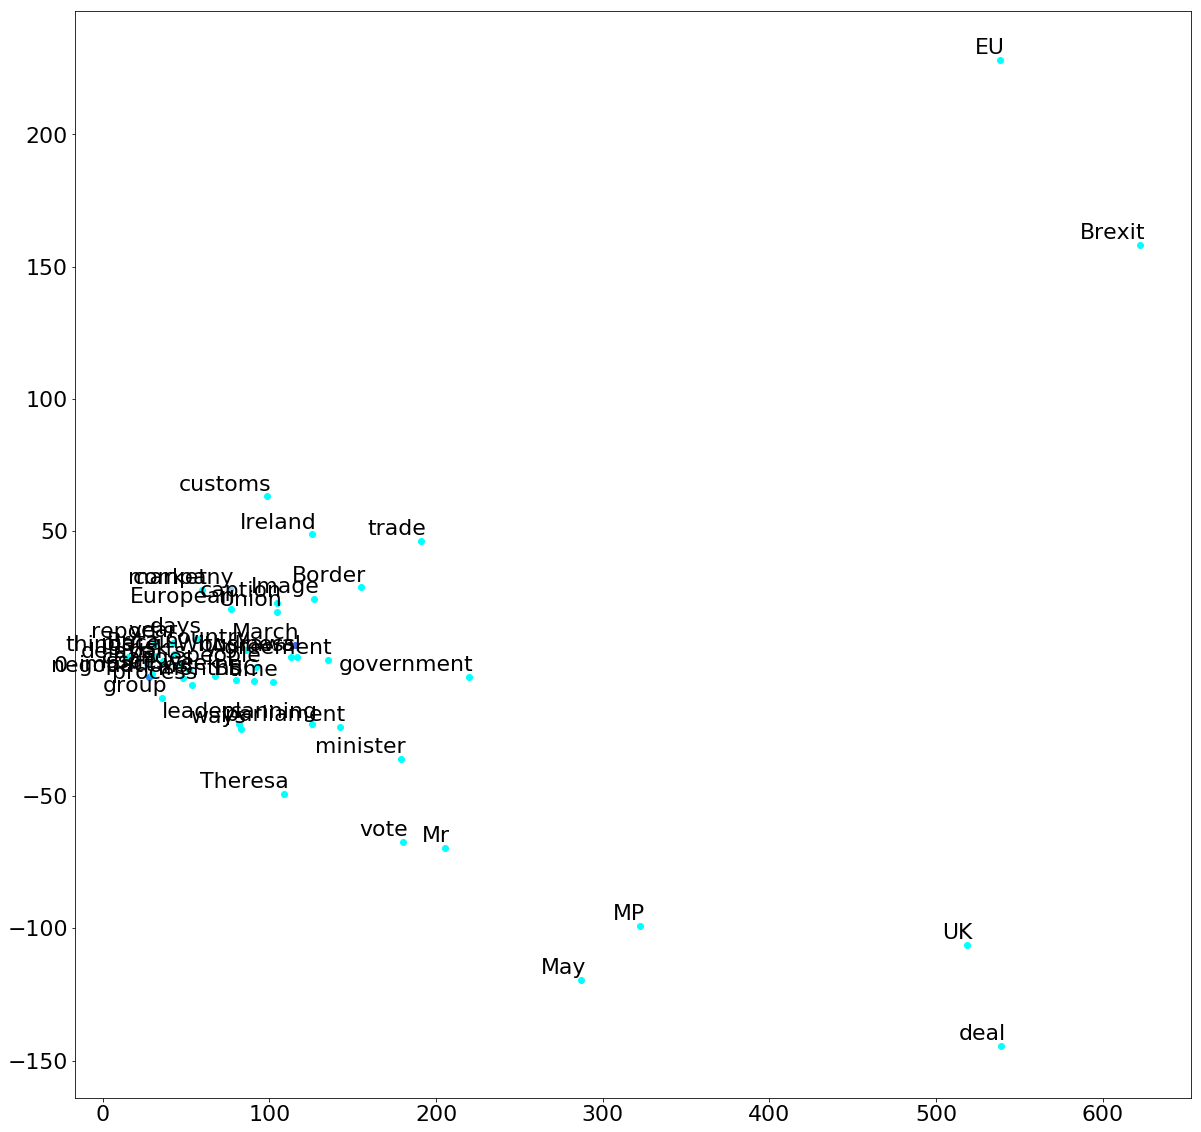

In [7]:
from packages.gc.plotter import Plotter

# Display TSNE word co-occurance trained points (all topic)

tsnePoints = tsneProcessor.getPoints(50)
plotProcessor = Plotter(tsnePoints)
plotProcessor.displayPlot()


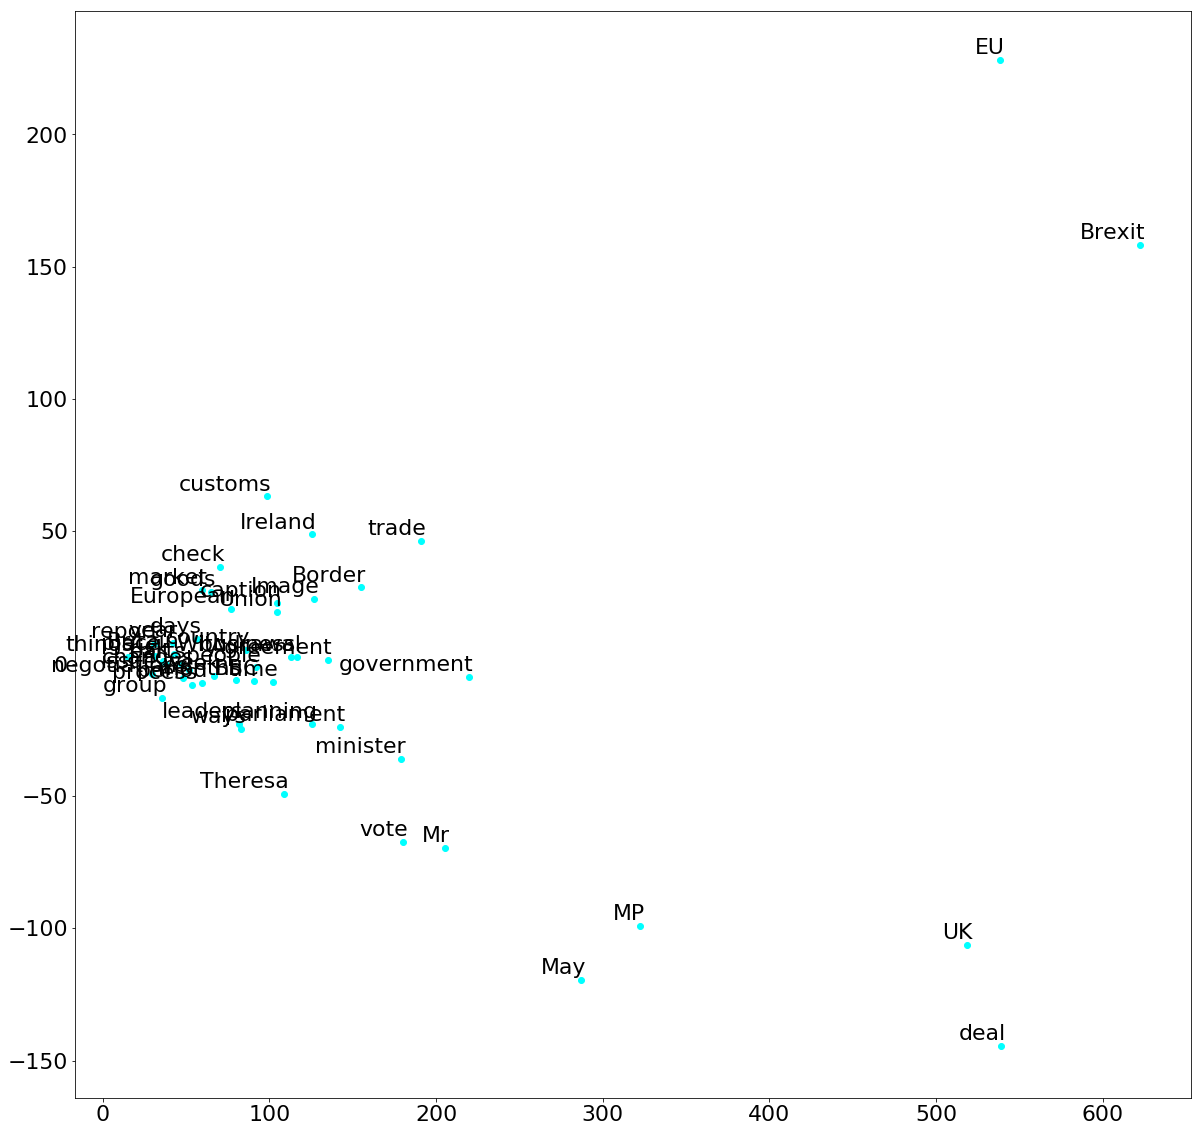

In [8]:
# Display TSNE word co-occurance trained points (all topic)

tsneProcessor.setTopicFilter(9)
tsnePoints = tsneProcessor.getPoints(50)
plotProcessor = Plotter(tsnePoints)
plotProcessor.displayPlot()


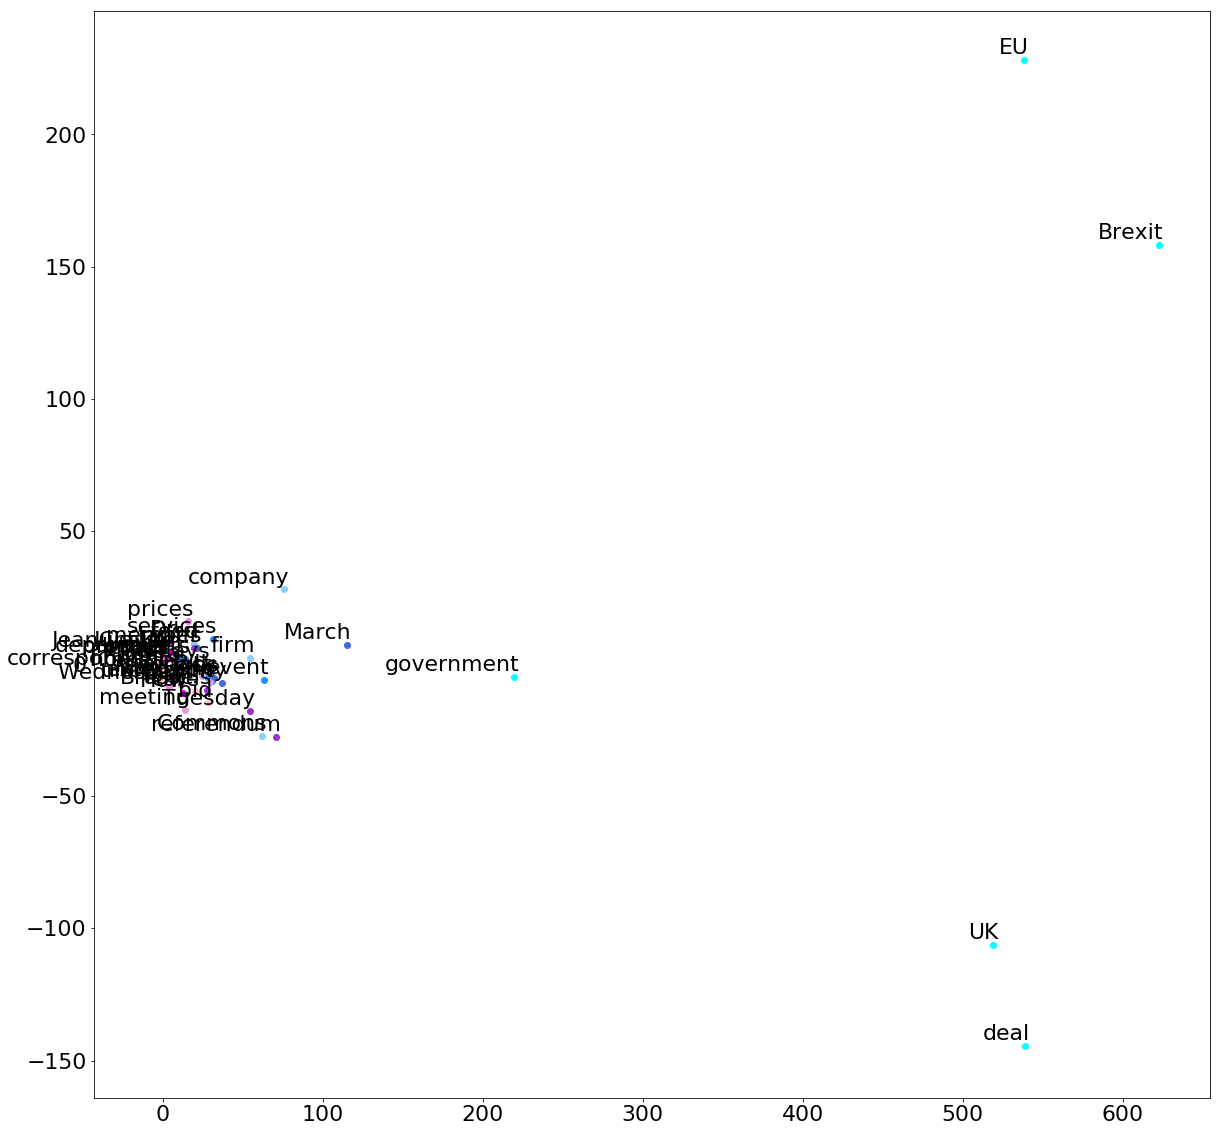

[{'number_of_blocks': 160, 'total_count': 1632, 'label': 'Brexit', 'stemmed_word': 'brexit', 'score': 258021, 'appeared': 1548806400, 'index': 3, 'topic': 9, 'x': 622.5113, 'y': 158.1027}, {'number_of_blocks': 150, 'total_count': 935, 'label': 'EU', 'stemmed_word': 'eu', 'score': 106971, 'appeared': 1548806400, 'index': 21, 'topic': 9, 'x': 538.317, 'y': 228.11934}, {'number_of_blocks': 148, 'total_count': 982, 'label': 'UK', 'stemmed_word': 'uk', 'score': 84157, 'appeared': 1548806400, 'index': 19, 'topic': 9, 'x': 518.9062, 'y': -106.433}, {'number_of_blocks': 135, 'total_count': 957, 'label': 'deal', 'stemmed_word': 'deal', 'score': 142767, 'appeared': 1546560000, 'index': 79, 'topic': 9, 'x': 538.9048, 'y': -144.35278}, {'number_of_blocks': 107, 'total_count': 388, 'label': 'government', 'stemmed_word': 'govern', 'score': 16278, 'appeared': 1548806400, 'index': 38, 'topic': 9, 'x': 219.53929, 'y': -4.9700737}, {'number_of_blocks': 72, 'total_count': 234, 'label': 'company', 'stemme

In [21]:
# Display TSNE word co-occurance trained points (main topic)

numberOfWords = 5

tsneProcessor.setTopicFilter(9)
tsnePoints = tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(8)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(7)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(6)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(5)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(4)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(3)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(2)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(1)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

plotProcessor = Plotter(tsnePoints)
plotProcessor.displayPlot()

print(tsnePoints)



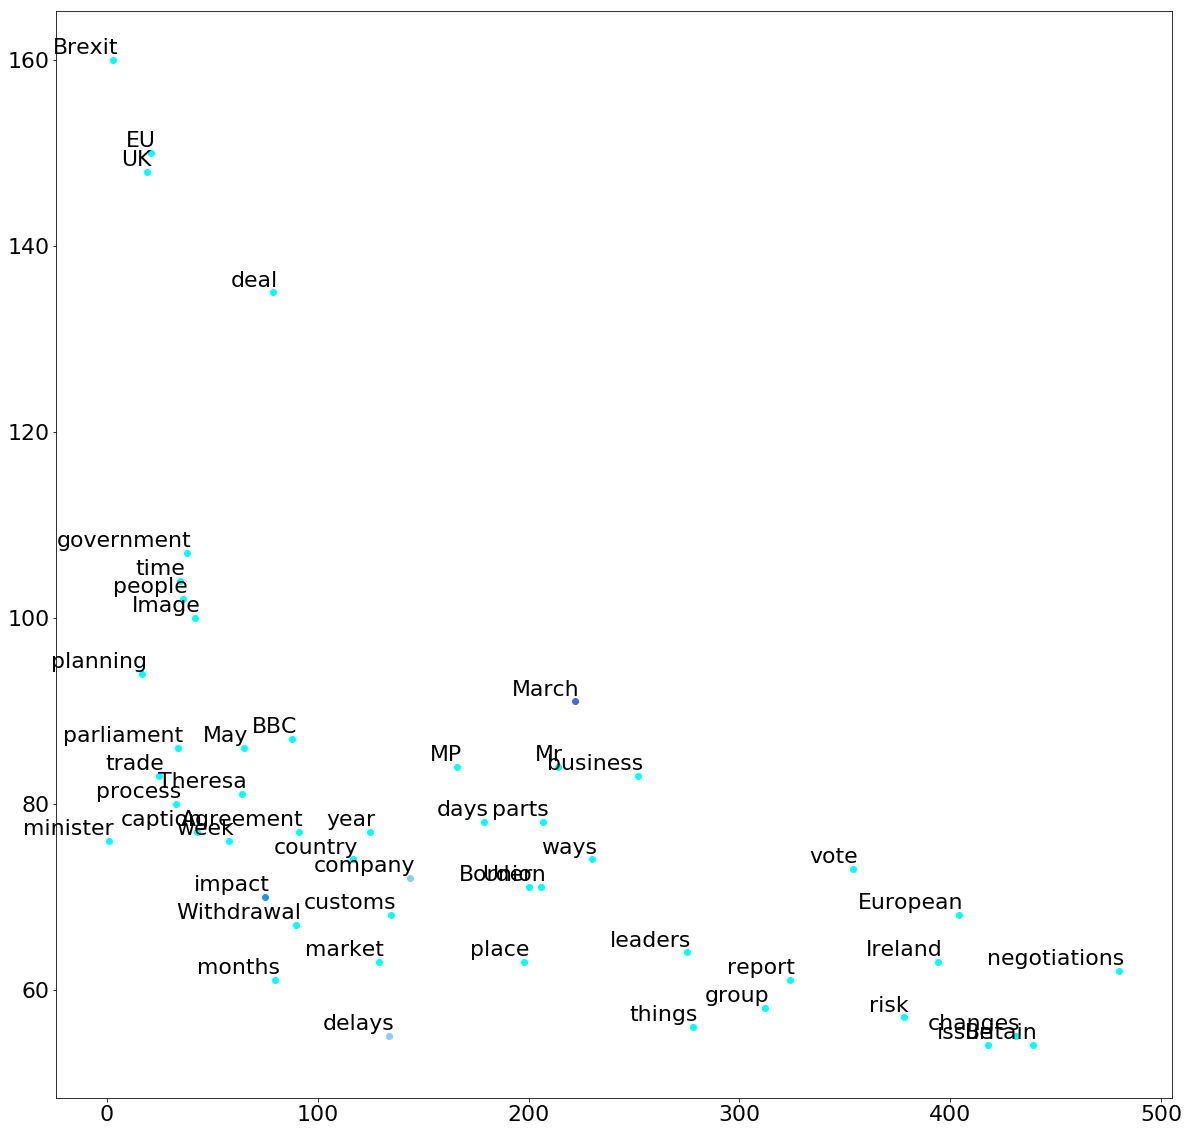

In [10]:
from packages.gc.linear import Linear
linearProcessor = Linear(dataProcessor)

# Display top 50 points (all topics)
linearProcessor.setStartX(0)
wordInfo = linearProcessor.getPoints(50)
linearPlotProcessor = Plotter(wordInfo)
linearPlotProcessor.displayPlot()

[{'number_of_blocks': 28, 'total_count': 33, 'label': 'How', 'stemmed_word': 'how', 'score': 0, 'appeared': 1548979200, 'index': 521, 'y': 28, 'topic': 1, 'x': 521}, {'number_of_blocks': 21, 'total_count': 24, 'label': 'editor', 'stemmed_word': 'editor', 'score': 0, 'appeared': 1548892800, 'index': 412, 'y': 21, 'topic': 1, 'x': 412}, {'number_of_blocks': 19, 'total_count': 27, 'label': 'Laura', 'stemmed_word': 'laura', 'score': 0, 'appeared': 1547510400, 'index': 878, 'y': 19, 'topic': 1, 'x': 878}, {'number_of_blocks': 17, 'total_count': 20, 'label': 'JeanClaude', 'stemmed_word': 'jeanclaud', 'score': 0, 'appeared': 1548979200, 'index': 458, 'y': 17, 'topic': 1, 'x': 458}, {'number_of_blocks': 17, 'total_count': 20, 'label': 'Juncker', 'stemmed_word': 'juncker', 'score': 0, 'appeared': 1548979200, 'index': 459, 'y': 17, 'topic': 1, 'x': 459}, {'number_of_blocks': 23, 'total_count': 29, 'label': 'bid', 'stemmed_word': 'bid', 'score': 0, 'appeared': 1547078400, 'index': 895, 'y': 23, '

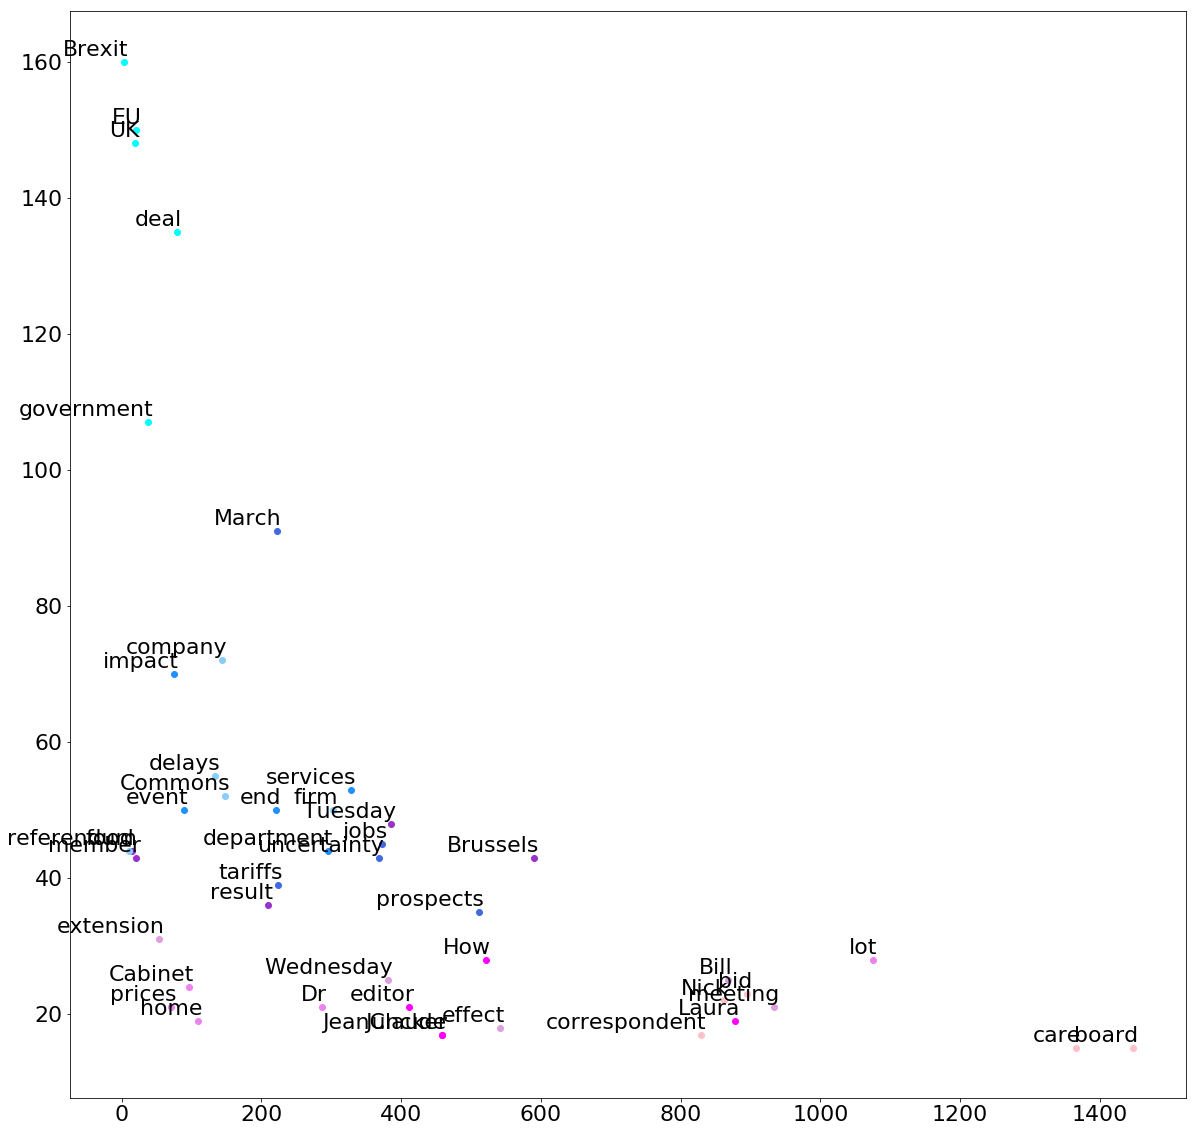

In [11]:
# Display TSNE word co-occurance trained points (main topic)

numberOfWords = 5

linearProcessor.setTopicFilter(1)
linearProcessor.setStartX(0)
wordInfo = linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(2)
wordInfo += linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(3)
wordInfo += linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(4)
wordInfo += linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(5)
wordInfo += linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(6)
wordInfo += linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(7)
wordInfo += linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(8)
wordInfo += linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(9)
wordInfo += linearProcessor.getPoints(numberOfWords)

plotProcessor = Plotter(wordInfo)
print(wordInfo)
plotProcessor.displayPlot()

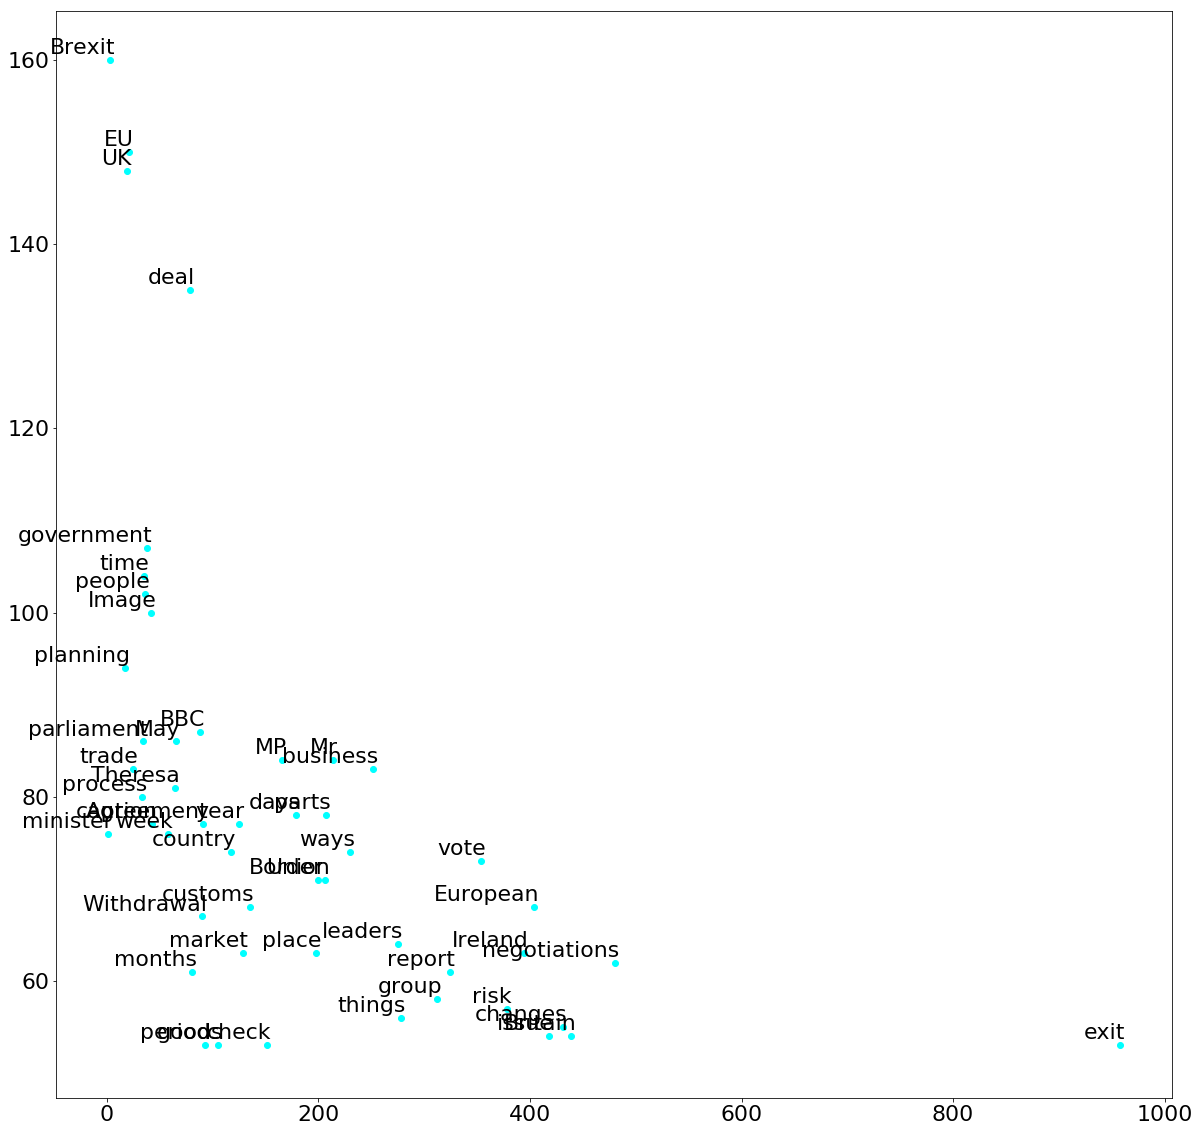

In [12]:
# Display top 50 points (top topic)
linearProcessor.setTopicFilter(9)
wordInfo = linearProcessor.getPoints(50)
linearPlotProcessor = Plotter(wordInfo)
linearPlotProcessor.displayPlot()

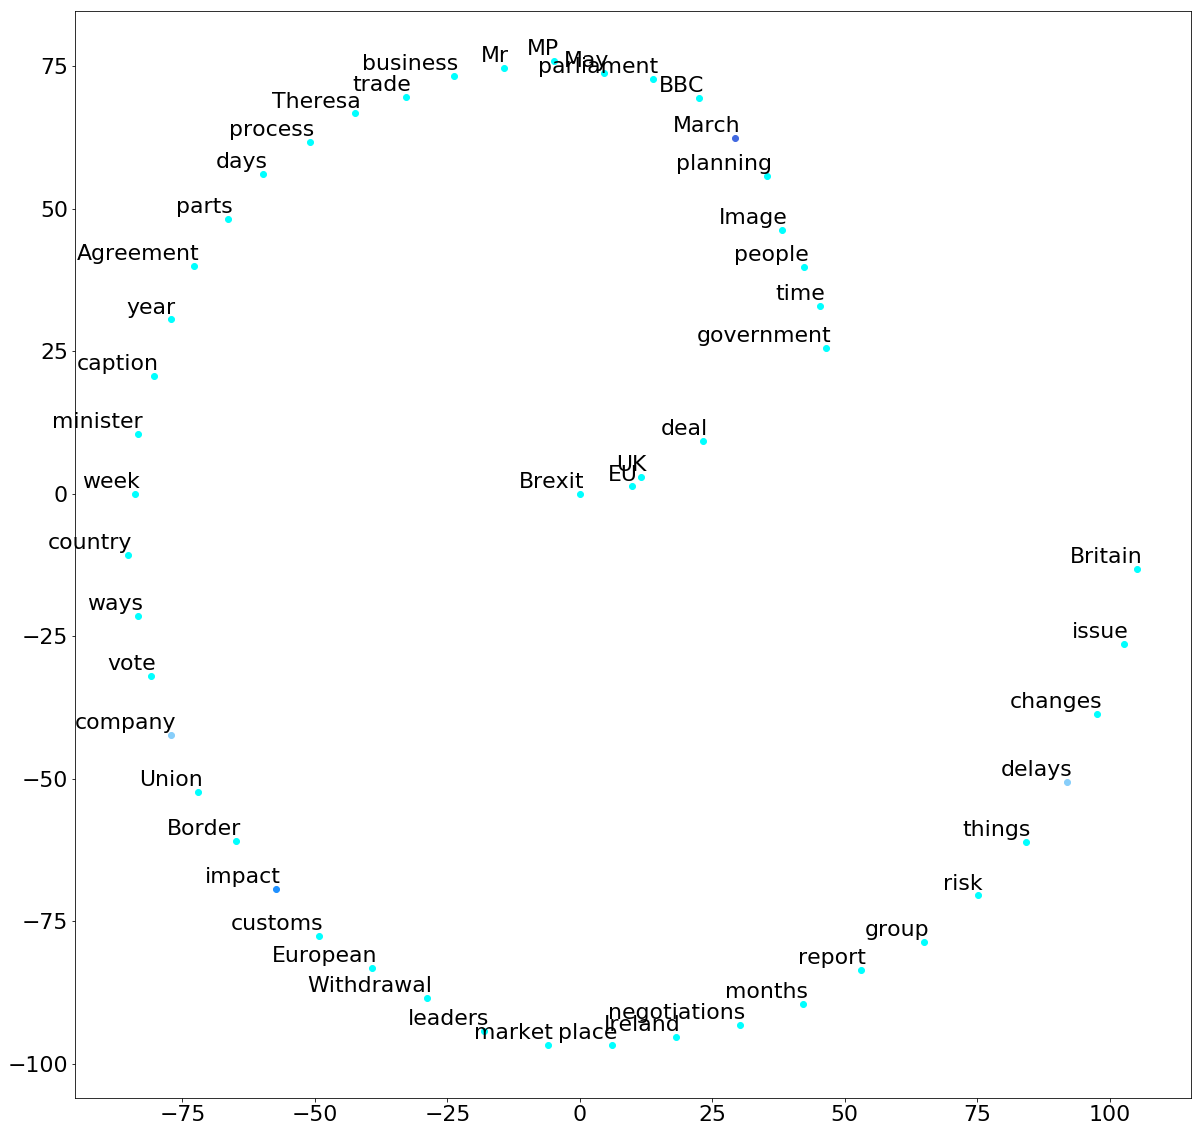

In [13]:

from packages.gc.peripheral import Peripheral
peripheralProcessor = Peripheral(dataProcessor)


# Display top 50 points (all topics)
peripheralProcessor.setTotalAngle(360)
peripheralProcessor.setStartAngle(0)
wordInfo = peripheralProcessor.getPoints(50)
plotProcessor = Plotter(wordInfo)
plotProcessor.displayPlot()


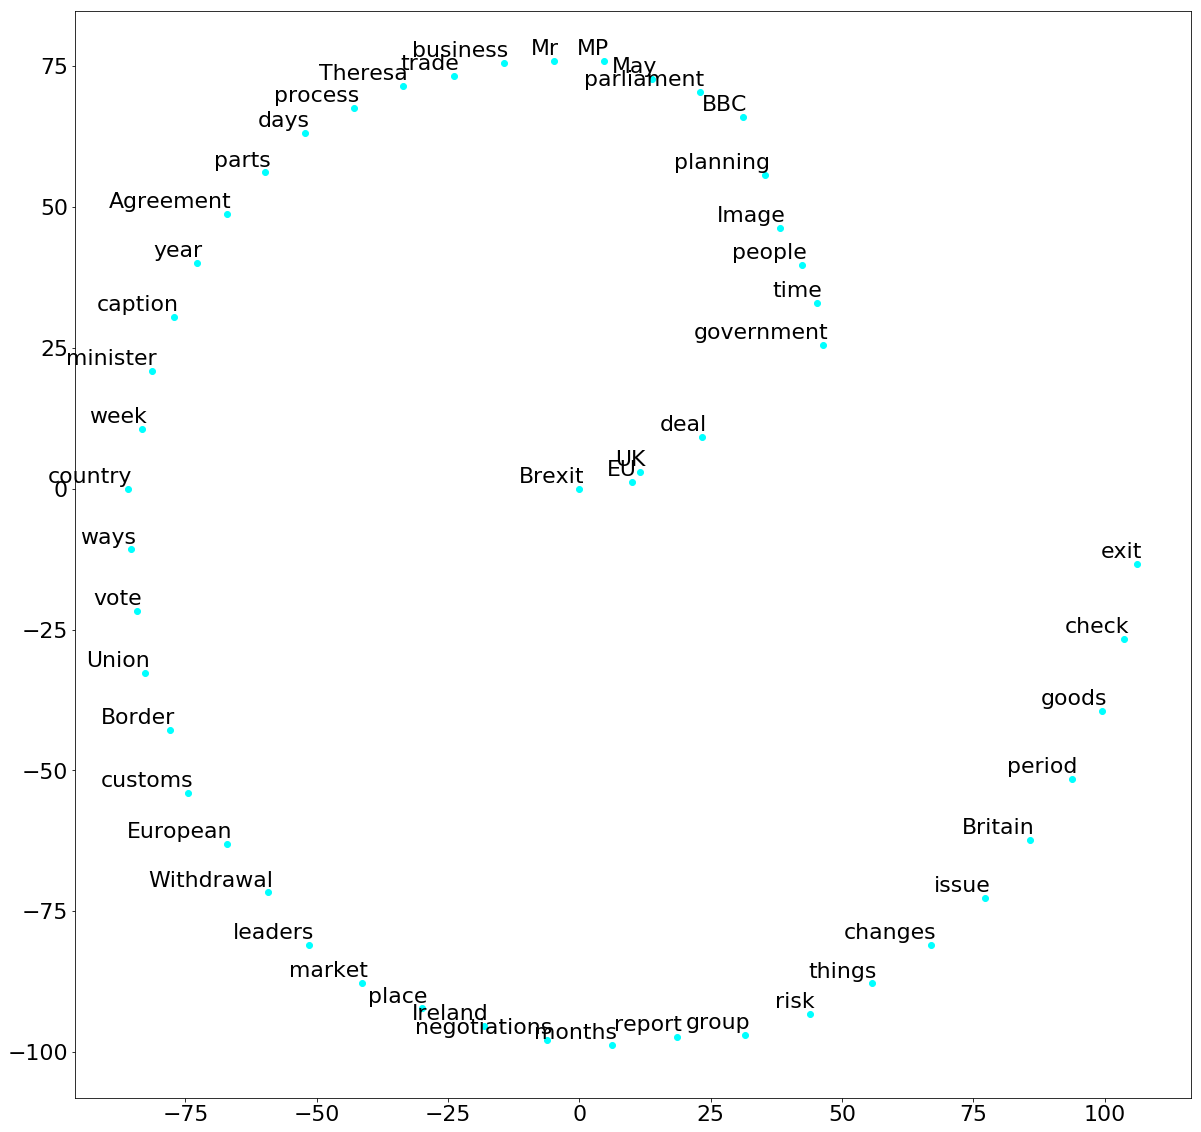

In [14]:
# Display top 50 points (top topic)
peripheralProcessor.setTotalAngle(360)
peripheralProcessor.setStartAngle(0)
peripheralProcessor.setTopicFilter(9)
wordInfo = peripheralProcessor.getPoints(50)
plotProcessor = Plotter(wordInfo)
plotProcessor.displayPlot()

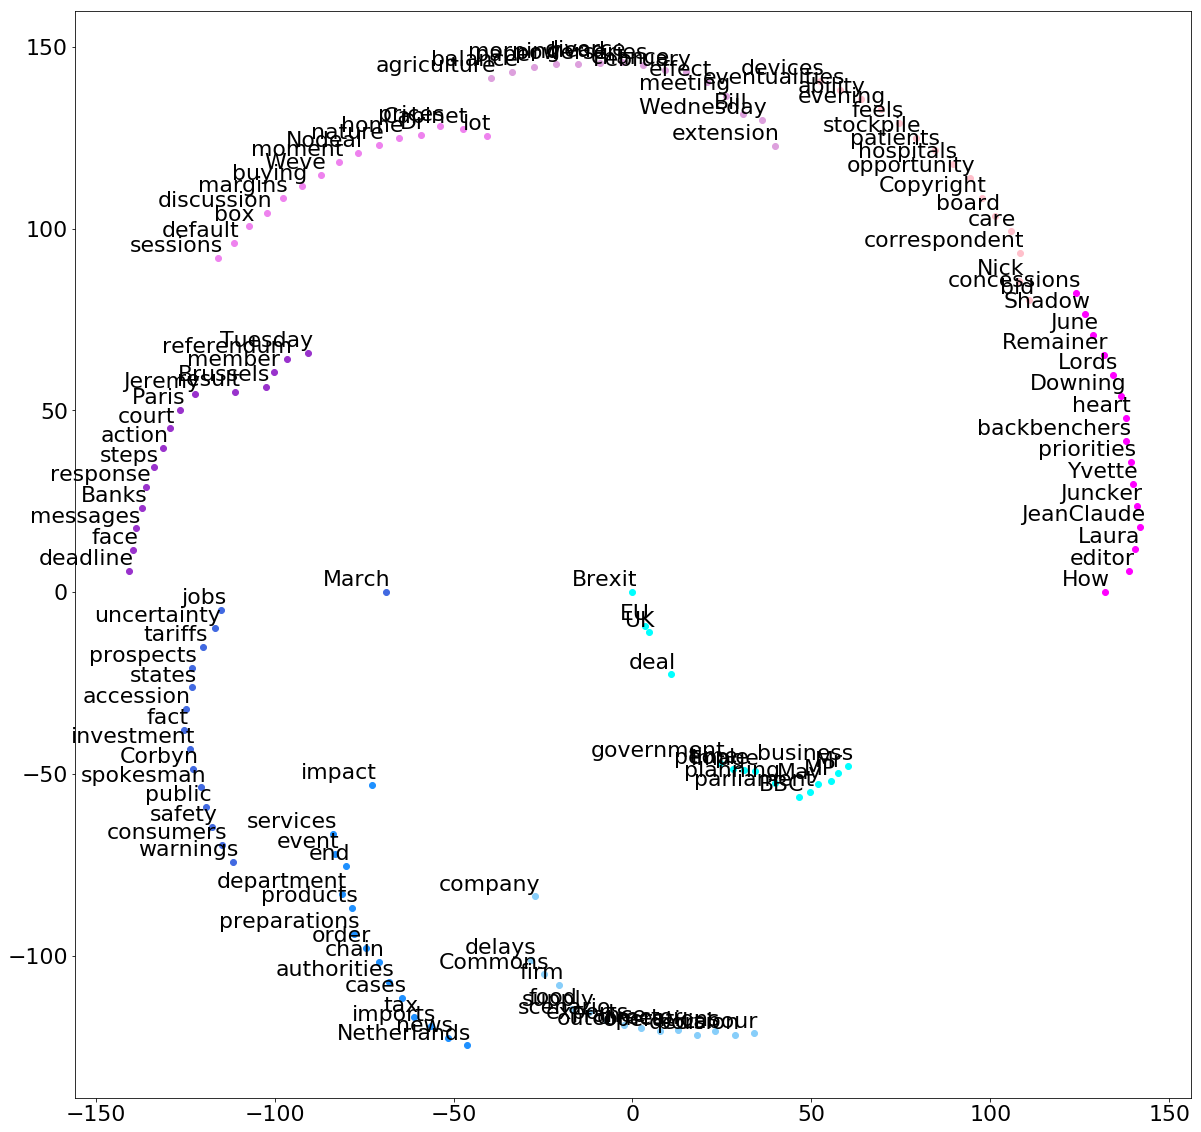

In [19]:

# All topics
peripheralProcessor.setStartAngle(0)
peripheralProcessor.setTotalAngle(360 / 10)

numberOfWords = 15
peripheralProcessor.setTopicFilter(1)
wordInfo = peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(2)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(3)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(4)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(5)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(6)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(7)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(8)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(9)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

plotProcessor = Plotter(wordInfo)
plotProcessor.displayPlot()



In [16]:
from packages.gc.word2vec import Word2Vec
word2vecProcessor = Word2Vec(dataProcessor)

if train:
    word2vecProcessor.setNumberOfIterations(500)
    word2vecProcessor.setPerplexity(10)
    word2vecProcessor.setNumberOfTopics(10)
    skipWindow = 2
    word2vecProcessor.resetIndex()
    word2vecProcessor.setSkipWindow(skipWindow)
    word2vecProcessor.setBatchSize(128)
    word2vecProcessor.train()



Instructions for updating:
Colocations handled automatically by placer.
Batches:  14
Instructions for updating:
Use tf.cast instead.
--------------------------

Average loss after epoch  0 :  12.938299996512276

Average loss after epoch  0 :  11.80686125463369

Average loss after epoch  0 :  11.754362334315354

Average loss after epoch  0 :  11.50442056922007

Average loss after epoch  0 :  11.328691435050317

Average loss after epoch  0 :  12.625217025634173

Average loss after epoch  0 :  12.186234853463267

Average loss after epoch  0 :  9.733940219722824

Average loss after epoch  0 :  10.784899582170492

Average loss after epoch  0 :  10.745369152632714

Average loss after epoch  0 :  10.561556693798542

Average loss after epoch  0 :  10.735920692972217

Average loss after epoch  0 :  10.525508661035405

Average loss after epoch  0 :  9.343376416462073
Similar to Cable: Due, bid, Kelly, plenty, bound,
Similar to majority: devastation, codicil, Netherlands, period, Cheaper,
Similar


Average loss after epoch  7 :  4.493374415806362

Average loss after epoch  7 :  4.200299165686783

Average loss after epoch  7 :  4.846274845801707

Average loss after epoch  7 :  3.7071194984375664

Average loss after epoch  7 :  3.8947212038853283

Average loss after epoch  7 :  3.4077927167814295

Average loss after epoch  7 :  3.812128997243595

Average loss after epoch  7 :  4.174279551874822

Average loss after epoch  7 :  4.215056375461762

Average loss after epoch  7 :  4.861923963952486

Average loss after epoch  7 :  3.5008877878478897

Average loss after epoch  7 :  2.492391512259782

Average loss after epoch  7 :  3.2039253999409887

Average loss after epoch  7 :  3.390744841450863
Similar to Cable: bid, Due, Kelly, plenty, bound,
Similar to majority: devastation, Netherlands, period, codicil, Letwin,
Similar to contingency: harbour, delivers, certificates, Germany, CPTPP,
Similar to Concerns: fortnight, Monde, actors, leadership, Hening,
Similar to week: trade, declarati

Similar to week: trade, declarations, bus, Die, department,
Similar to May: check, food, matter, EU, Japan,
Similar to treaty: French, postponement, Vienna, vice, slashes,
Similar to Pier: Party, Type, kind, insurance, Austria,
--------------------------

Average loss after epoch  14 :  1.4417670113699776

Average loss after epoch  14 :  1.9745960430223115

Average loss after epoch  14 :  1.4832724176412422

Average loss after epoch  14 :  1.8489570521355072

Average loss after epoch  14 :  1.352457454538348

Average loss after epoch  14 :  1.2653641310998374

Average loss after epoch  14 :  1.5655038328941988

Average loss after epoch  14 :  2.6392095938465165

Average loss after epoch  14 :  2.009530465199416

Average loss after epoch  14 :  1.5806477013367886

Average loss after epoch  14 :  2.173400691173889

Average loss after epoch  14 :  1.623155716701804

Average loss after epoch  14 :  1.4661629628315183

Average loss after epoch  14 :  1.400476407658306
Similar to Cable: Kell


Average loss after epoch  20 :  1.0800826913760573
Similar to Cable: Kelly, plenty, bid, Due, scene,
Similar to majority: devastation, Netherlands, period, climate, debate,
Similar to contingency: harbour, delivers, certificates, CPTPP, Germany,
Similar to Concerns: fortnight, Monde, market, actors, negotiations,
Similar to week: trade, declarations, bus, Die, department,
Similar to May: check, matter, food, 1bn, Japan,
Similar to treaty: French, postponement, vice, Vienna, slashes,
Similar to Pier: Party, Austria, insurance, kind, Type,
--------------------------

Average loss after epoch  21 :  0.6812825202941895

Average loss after epoch  21 :  0.5233775888170514

Average loss after epoch  21 :  0.881452640708612

Average loss after epoch  21 :  1.026135790973641

Average loss after epoch  21 :  1.0176883672411765

Average loss after epoch  21 :  1.871426963626881

Average loss after epoch  21 :  1.2436261449413313

Average loss after epoch  21 :  0.9678978598838535

Average loss a


Average loss after epoch  28 :  0.36023244970138607

Average loss after epoch  28 :  0.36148419388213027

Average loss after epoch  28 :  0.3035891328596489

Average loss after epoch  28 :  0.45504687708292274

Average loss after epoch  28 :  0.27603917354747926

Average loss after epoch  28 :  0.33735786522740785

Average loss after epoch  28 :  0.4963655377039701

Average loss after epoch  28 :  0.3251797805556896

Average loss after epoch  28 :  0.30553774926158106

Average loss after epoch  28 :  0.7896451644195633
Similar to Cable: Kelly, plenty, bid, Due, scene,
Similar to majority: devastation, Netherlands, period, climate, debate,
Similar to contingency: harbour, delivers, Germany, CPTPP, certificates,
Similar to Concerns: fortnight, Monde, market, actors, negotiations,
Similar to week: trade, declarations, bus, department, Die,
Similar to May: matter, check, food, 1bn, inland,
Similar to treaty: postponement, French, vice, Vienna, slashes,
Similar to Pier: Party, Austria, kin


Average loss after epoch  35 :  0.2579731682267278

Average loss after epoch  35 :  0.3154789701765952

Average loss after epoch  35 :  0.29342938672691715

Average loss after epoch  35 :  0.2503596041963144

Average loss after epoch  35 :  0.25974366135799914
Similar to Cable: Kelly, plenty, bid, scene, reason,
Similar to majority: devastation, Netherlands, period, climate, debate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, fortnight, market, negotiations, Northern,
Similar to week: trade, declarations, bus, department, Die,
Similar to May: matter, food, check, 1bn, inland,
Similar to treaty: postponement, vice, French, slashes, Vienna,
Similar to Pier: Party, Austria, kind, insurance, fine,
--------------------------

Average loss after epoch  36 :  0.27775815555027555

Average loss after epoch  36 :  0.35141798671411006

Average loss after epoch  36 :  0.3035434972788085

Average loss after epoch  36 :  0.38268909632836917

Average l


Average loss after epoch  42 :  0.24112666503405927

Average loss after epoch  42 :  0.3047449679997821

Average loss after epoch  42 :  0.23522077353105134

Average loss after epoch  42 :  0.23043818867724933

Average loss after epoch  42 :  0.20971597631525554

Average loss after epoch  42 :  0.21885535646034956
Similar to Cable: Kelly, plenty, scene, bid, reason,
Similar to majority: devastation, Netherlands, period, climate, Cheaper,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, fortnight, market, Office, negotiations,
Similar to week: declarations, trade, bus, department, Die,
Similar to May: matter, food, check, 1bn, inland,
Similar to treaty: postponement, vice, slashes, Vienna, French,
Similar to Pier: Party, Austria, kind, insurance, fine,
--------------------------

Average loss after epoch  43 :  0.2687338079724993

Average loss after epoch  43 :  0.5316876902872203

Average loss after epoch  43 :  0.25004103875368744

Average l


Average loss after epoch  50 :  0.2277286259495482

Average loss after epoch  50 :  0.17866957335360892

Average loss after epoch  50 :  0.169362757992665

Average loss after epoch  50 :  0.17038202104057018

Average loss after epoch  50 :  0.19070839868917716

Average loss after epoch  50 :  0.182364583006171

Average loss after epoch  50 :  0.17828083889758783

Average loss after epoch  50 :  0.2043427405308231

Average loss after epoch  50 :  0.2030255040778329

Average loss after epoch  50 :  0.19296168742615277

Average loss after epoch  50 :  0.15538341619999516

Average loss after epoch  50 :  0.16326824740173654
Similar to Cable: Kelly, plenty, scene, reason, EUJapan,
Similar to majority: devastation, Netherlands, period, climate, Cheaper,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, fortnight, Office, negotiations,
Similar to week: declarations, trade, bus, department, Die,
Similar to May: matter, food, check, inland, 1bn


Average loss after epoch  57 :  0.18240632761014056

Average loss after epoch  57 :  0.1997059002862747

Average loss after epoch  57 :  0.1796954743588707

Average loss after epoch  57 :  0.15384875786109156

Average loss after epoch  57 :  0.15234353645344817

Average loss after epoch  57 :  0.1870118397358629

Average loss after epoch  57 :  0.18114652816655788

Average loss after epoch  57 :  0.1675267152730926

Average loss after epoch  57 :  0.14709713581590642
Similar to Cable: Kelly, plenty, scene, reason, EUJapan,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, fortnight, Office, negotiations,
Similar to week: declarations, trade, bus, department, Die,
Similar to May: matter, food, check, inland, 1bn,
Similar to treaty: postponement, vice, slashes, Vienna, profit,
Similar to Pier: Party, Austria, kind, insurance, fine,
--------------------------

Averag


Average loss after epoch  64 :  0.16355136504446732

Average loss after epoch  64 :  0.141168690487512

Average loss after epoch  64 :  0.15684911869571097

Average loss after epoch  64 :  0.17174449794534094

Average loss after epoch  64 :  0.17731364513652895

Average loss after epoch  64 :  0.15311961226890297

Average loss after epoch  64 :  0.16696846829512985
Similar to Cable: Kelly, plenty, scene, reason, EUJapan,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, fortnight, Office, negotiations,
Similar to week: declarations, trade, bus, department, Die,
Similar to May: matter, inland, food, check, 1bn,
Similar to treaty: postponement, vice, slashes, Vienna, profit,
Similar to Pier: Party, Austria, kind, insurance, fine,
--------------------------

Average loss after epoch  65 :  0.21973364693777903

Average loss after epoch  65 :  0.19648333471648546

Aver


Average loss after epoch  71 :  0.17676706625143224

Average loss after epoch  71 :  0.1459089400605925

Average loss after epoch  71 :  0.14201428976964786

Average loss after epoch  71 :  0.15930112947119973

Average loss after epoch  71 :  0.14907319825965287

Average loss after epoch  71 :  0.1819867289364892

Average loss after epoch  71 :  0.1490333023262915

Average loss after epoch  71 :  0.13905695465769724

Average loss after epoch  71 :  0.14438879730273313

Average loss after epoch  71 :  0.14680909276148327

Average loss after epoch  71 :  0.1543578073809123

Average loss after epoch  71 :  0.25241524098479734
Similar to Cable: Kelly, plenty, scene, reason, EUJapan,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, fortnight, Office, negotiations,
Similar to week: declarations, trade, bus, department, Die,
Similar to May: matter, inland, food, check, 


Average loss after epoch  78 :  0.15113958795730367

Average loss after epoch  78 :  0.12043304747049588

Average loss after epoch  78 :  0.13666356993977838

Average loss after epoch  78 :  0.13493237423986523

Average loss after epoch  78 :  0.14819993967675762

Average loss after epoch  78 :  0.1456778236761431
Similar to Cable: Kelly, plenty, scene, reason, EUJapan,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, fortnight, Northern,
Similar to week: declarations, trade, bus, department, Die,
Similar to May: matter, inland, food, 1bn, check,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Party, Austria, kind, insurance, fine,
--------------------------

Average loss after epoch  79 :  0.20457022530691965

Average loss after epoch  79 :  0.17519882260536662

Average loss after epoch  79 :  0.1600339774140116

Average 


Average loss after epoch  85 :  0.14621044299442673

Average loss after epoch  85 :  0.13237963482130077

Average loss after epoch  85 :  0.12233591815147264

Average loss after epoch  85 :  0.12090066553603572

Average loss after epoch  85 :  0.12171331720795728

Average loss after epoch  85 :  0.12402923027478974

Average loss after epoch  85 :  0.11457233423264489
Similar to Cable: Kelly, plenty, scene, reason, EUJapan,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, negotiations, Northern,
Similar to week: declarations, trade, bus, department, Die,
Similar to May: matter, inland, food, 1bn, check,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Party, Austria, kind, insurance, fine,
--------------------------

Average loss after epoch  86 :  0.19744910512651717

Average loss after epoch  86 :  0.15834010620506442

Ave

Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, negotiations, Northern,
Similar to week: declarations, trade, bus, department, Die,
Similar to May: matter, inland, 1bn, food, check,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Party, Austria, kind, insurance, fine,
--------------------------

Average loss after epoch  93 :  0.22284603118896484

Average loss after epoch  93 :  0.16357813562665666

Average loss after epoch  93 :  0.14923926640530022

Average loss after epoch  93 :  0.15674456276281928

Average loss after epoch  93 :  0.11583618345557525

Average loss after epoch  93 :  0.12812788431325048

Average loss after epoch  93 :  0.13541383909645427

Average loss after epoch  93 :  0.13952707915608567

Average loss after epoch  93 :  0.16960751986865805

Average loss after epoch  93 :  0.12150371072999396

Average loss after epoch  93 :  0.12369780029449559

Average loss after epoch  9


Average loss after epoch  99 :  0.11484887290181969

Average loss after epoch  99 :  0.11648861147689128

Average loss after epoch  99 :  0.11450635789244466

Average loss after epoch  99 :  0.13679256566820336

Average loss after epoch  99 :  0.11995921144063827

Average loss after epoch  99 :  0.1089453169342844
Similar to Cable: Kelly, plenty, scene, reason, EUJapan,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, negotiations, Northern,
Similar to week: declarations, trade, bus, department, Die,
Similar to May: matter, inland, 1bn, food, check,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Party, Austria, kind, insurance, fine,
--------------------------

Average loss after epoch  100 :  0.204404422215053

Average loss after epoch  100 :  0.15512927575987212

Average loss after epoch  100 :  0.15441006152692413

Ave


Average loss after epoch  106 :  0.2007066352026803

Average loss after epoch  106 :  0.16998249535657922

Average loss after epoch  106 :  0.16259255171169693

Average loss after epoch  106 :  0.14902018802531408

Average loss after epoch  106 :  0.12539802228919655

Average loss after epoch  106 :  0.12180298441613856

Average loss after epoch  106 :  0.11587665327529477

Average loss after epoch  106 :  0.12268141185111969

Average loss after epoch  106 :  0.11633771038826532

Average loss after epoch  106 :  0.11557263517434839

Average loss after epoch  106 :  0.11883152835713642

Average loss after epoch  106 :  0.14866056705737882

Average loss after epoch  106 :  0.1323872397806139

Average loss after epoch  106 :  0.12679213846344245
Similar to Cable: Kelly, plenty, scene, reason, EUJapan,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern


Average loss after epoch  113 :  0.11253360696418709

Average loss after epoch  113 :  0.12338939152145927

Average loss after epoch  113 :  0.10125406500979871

Average loss after epoch  113 :  0.10783742717141523

Average loss after epoch  113 :  0.1513836205369196

Average loss after epoch  113 :  0.1438558940402522
Similar to Cable: Kelly, plenty, scene, reason, EUJapan,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: declarations, trade, bus, department, Die,
Similar to May: matter, inland, 1bn, food, check,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Party, Austria, kind, insurance, fine,
--------------------------

Average loss after epoch  114 :  0.21494197845458984

Average loss after epoch  114 :  0.17552198682512557

Average loss after epoch  114 :  0.139956816118590


Average loss after epoch  120 :  0.16369842144907737

Average loss after epoch  120 :  0.1417097099147107

Average loss after epoch  120 :  0.14364155025369968

Average loss after epoch  120 :  0.09463617339807397

Average loss after epoch  120 :  0.1437339506937476

Average loss after epoch  120 :  0.1327354803141626

Average loss after epoch  120 :  0.11471979883779139

Average loss after epoch  120 :  0.15314154473619027

Average loss after epoch  120 :  0.13188641741706955

Average loss after epoch  120 :  0.12091261536935541

Average loss after epoch  120 :  0.11452889044445155

Average loss after epoch  120 :  0.13226952694665917

Average loss after epoch  120 :  0.12017204260741779
Similar to Cable: Kelly, plenty, scene, reason, EUJapan,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: declarations, bus, tra


Average loss after epoch  127 :  0.11174992398240889

Average loss after epoch  127 :  0.11121933210167056
Similar to Cable: Kelly, plenty, scene, reason, EUJapan,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: declarations, bus, trade, department, Die,
Similar to May: matter, inland, 1bn, food, check,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Party, Austria, kind, insurance, fine,
--------------------------

Average loss after epoch  128 :  0.22199038096836635

Average loss after epoch  128 :  0.13989561187977692

Average loss after epoch  128 :  0.15323577139189917

Average loss after epoch  128 :  0.16458912251493127

Average loss after epoch  128 :  0.10851253466811973

Average loss after epoch  128 :  0.12423827917590538

Average loss after epoch  128 :  0.1413245730962


Average loss after epoch  134 :  0.1158292777511374

Average loss after epoch  134 :  0.12820652047206174

Average loss after epoch  134 :  0.1208973121922706
Similar to Cable: Kelly, plenty, scene, reason, EUJapan,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: declarations, bus, trade, department, Die,
Similar to May: matter, inland, 1bn, food, check,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Party, Austria, kind, insurance, fine,
--------------------------

Average loss after epoch  135 :  0.21213698387145996

Average loss after epoch  135 :  0.16081515380314418

Average loss after epoch  135 :  0.14115857469792267

Average loss after epoch  135 :  0.14523225979276716

Average loss after epoch  135 :  0.09878649453057294

Average loss after epoch  135 :  0.141398882681226


Average loss after epoch  141 :  0.1341794451536419

Average loss after epoch  141 :  0.12656205694208317

Average loss after epoch  141 :  0.0984004095908643

Average loss after epoch  141 :  0.09555362346425399

Average loss after epoch  141 :  0.09086364414199104

Average loss after epoch  141 :  0.11917343729018023

Average loss after epoch  141 :  0.10694072288649341

Average loss after epoch  141 :  0.12537170992179786
Similar to Cable: Kelly, plenty, scene, reason, EUJapan,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: declarations, bus, trade, department, Die,
Similar to May: matter, inland, 1bn, food, check,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Party, Austria, kind, insurance, fine,
--------------------------

Average loss after epoch  142 :  0.195003083774021


Average loss after epoch  148 :  0.11086149132126906

Average loss after epoch  148 :  0.12539904963109774

Average loss after epoch  148 :  0.11533009555448655

Average loss after epoch  148 :  0.12104438851738938

Average loss after epoch  148 :  0.12153252470384393

Average loss after epoch  148 :  0.09763864712196471

Average loss after epoch  148 :  0.09530491774726332

Average loss after epoch  148 :  0.11924952775626553

Average loss after epoch  148 :  0.1038577347357991

Average loss after epoch  148 :  0.11201461574406797
Similar to Cable: Kelly, plenty, scene, reason, EUJapan,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: declarations, bus, trade, department, Die,
Similar to May: matter, inland, 1bn, food, check,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria,


Average loss after epoch  155 :  0.08969184998056028

Average loss after epoch  155 :  0.12772135028057208

Average loss after epoch  155 :  0.14839685253359938

Average loss after epoch  155 :  0.1310958608928593

Average loss after epoch  155 :  0.1212356242746347

Average loss after epoch  155 :  0.1232506388227871

Average loss after epoch  155 :  0.09498479787651082

Average loss after epoch  155 :  0.1094296339183644

Average loss after epoch  155 :  0.13731709806003453

Average loss after epoch  155 :  0.10981715838673446
Similar to Cable: Kelly, plenty, scene, reason, EUJapan,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: declarations, bus, trade, department, Die,
Similar to May: matter, inland, 1bn, food, check,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Pa


Average loss after epoch  162 :  0.1088946974638673

Average loss after epoch  162 :  0.12710916085160612

Average loss after epoch  162 :  0.1265162733928908

Average loss after epoch  162 :  0.1363084863178542

Average loss after epoch  162 :  0.12228815435336182
Similar to Cable: Kelly, plenty, scene, reason, EUJapan,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: declarations, bus, trade, department, Die,
Similar to May: matter, inland, 1bn, food, check,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  163 :  0.20381053856440953

Average loss after epoch  163 :  0.17134760715523542

Average loss after epoch  163 :  0.1597741493852076

Average loss after epoch  163 :  0.16363478309534232


Average loss after epoch  169 :  0.11026637230025679

Average loss after epoch  169 :  0.16227682465152155

Average loss after epoch  169 :  0.13279914574526336

Average loss after epoch  169 :  0.11999111496032887

Average loss after epoch  169 :  0.09567545504983097
Similar to Cable: Kelly, plenty, scene, reason, process,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: declarations, bus, trade, department, Die,
Similar to May: matter, inland, 1bn, food, check,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  170 :  0.21968892642429896

Average loss after epoch  170 :  0.15932817361792742

Average loss after epoch  170 :  0.13760343272206388

Average loss after epoch  170 :  0.1555310935340


Average loss after epoch  176 :  0.10214163481961822

Average loss after epoch  176 :  0.10447788353460966

Average loss after epoch  176 :  0.1072147404265531

Average loss after epoch  176 :  0.12550394389680544

Average loss after epoch  176 :  0.10797718923265844
Similar to Cable: Kelly, plenty, scene, reason, EUJapan,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: declarations, bus, trade, department, Die,
Similar to May: matter, inland, 1bn, food, check,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  177 :  0.1986220223563058

Average loss after epoch  177 :  0.1572546131756841

Average loss after epoch  177 :  0.14961219946079976

Average loss after epoch  177 :  0.1485549049147066


Average loss after epoch  183 :  0.10083857400782467

Average loss after epoch  183 :  0.09746914479247697

Average loss after epoch  183 :  0.1091724672297012

Average loss after epoch  183 :  0.14482115874957024

Average loss after epoch  183 :  0.10092287345320765

Average loss after epoch  183 :  0.12695934452016494

Average loss after epoch  183 :  0.10322329123630362

Average loss after epoch  183 :  0.11752911743650425

Average loss after epoch  183 :  0.11358146748168808

Average loss after epoch  183 :  0.10276907177285322
Similar to Cable: Kelly, plenty, scene, reason, EUJapan,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: declarations, bus, trade, department, Die,
Similar to May: matter, inland, 1bn, food, check,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria,


Average loss after epoch  190 :  0.10054348925562089
Similar to Cable: Kelly, plenty, scene, reason, EUJapan,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: declarations, bus, trade, department, Die,
Similar to May: matter, inland, 1bn, food, check,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  191 :  0.19849249294825963

Average loss after epoch  191 :  0.17863106484315833

Average loss after epoch  191 :  0.14562043104505398

Average loss after epoch  191 :  0.13750724037058001

Average loss after epoch  191 :  0.11183532933363378

Average loss after epoch  191 :  0.10662670423584968

Average loss after epoch  191 :  0.11360476378173899

Average loss after epoch  191 :  0.1261844279961


Average loss after epoch  197 :  0.10567827185120669

Average loss after epoch  197 :  0.10284602298632015
Similar to Cable: Kelly, plenty, scene, reason, process,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: declarations, bus, trade, department, Die,
Similar to May: matter, inland, 1bn, check, food,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  198 :  0.19698750972747803

Average loss after epoch  198 :  0.14861189467566355

Average loss after epoch  198 :  0.14020919738983623

Average loss after epoch  198 :  0.14221739764637573

Average loss after epoch  198 :  0.1308413233044792

Average loss after epoch  198 :  0.11254764089756812

Average loss after epoch  198 :  0.14265291214682


Average loss after epoch  204 :  0.11546048166023852

Average loss after epoch  204 :  0.12914923872384795

Average loss after epoch  204 :  0.09560199581855348

Average loss after epoch  204 :  0.10509569872225595

Average loss after epoch  204 :  0.09555209210146416

Average loss after epoch  204 :  0.0995524359108642

Average loss after epoch  204 :  0.1303461650465332

Average loss after epoch  204 :  0.1377007099805446

Average loss after epoch  204 :  0.11821816033421649
Similar to Cable: Kelly, plenty, scene, reason, process,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: declarations, bus, trade, department, Die,
Similar to May: matter, inland, 1bn, food, check,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
-------------------------


Average loss after epoch  211 :  0.1055167228126465

Average loss after epoch  211 :  0.10682304778371496

Average loss after epoch  211 :  0.10355623001049973

Average loss after epoch  211 :  0.1181118285614756
Similar to Cable: Kelly, plenty, scene, reason, EUJapan,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: declarations, bus, trade, department, Die,
Similar to May: matter, inland, 1bn, check, food,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  212 :  0.20436275005340576

Average loss after epoch  212 :  0.15561189821788243

Average loss after epoch  212 :  0.1278445398320957

Average loss after epoch  212 :  0.11670231588901654

Average loss after epoch  212 :  0.0809197253898648


Average loss after epoch  218 :  0.14914710424384295

Average loss after epoch  218 :  0.13611077914780154

Average loss after epoch  218 :  0.12395972840143511

Average loss after epoch  218 :  0.11892081643297081

Average loss after epoch  218 :  0.09376054246166901

Average loss after epoch  218 :  0.14678890736254877

Average loss after epoch  218 :  0.1288815702933306

Average loss after epoch  218 :  0.1317106227501392

Average loss after epoch  218 :  0.10756291477754117

Average loss after epoch  218 :  0.11022989347497225

Average loss after epoch  218 :  0.09591330261097039

Average loss after epoch  218 :  0.16742358120500025

Average loss after epoch  218 :  0.13343379150701348
Similar to Cable: Kelly, plenty, scene, reason, process,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: declarations, bus, tr


Average loss after epoch  225 :  0.1112476466141291

Average loss after epoch  225 :  0.10978420205089412

Average loss after epoch  225 :  0.1245660495383207

Average loss after epoch  225 :  0.10039471523834598

Average loss after epoch  225 :  0.10554272712474304

Average loss after epoch  225 :  0.11431605956469636

Average loss after epoch  225 :  0.10419496989073829
Similar to Cable: Kelly, plenty, scene, reason, EUJapan,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: declarations, bus, trade, department, Die,
Similar to May: matter, inland, 1bn, food, check,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  226 :  0.2060814925602504

Average loss after epoch  226 :  0.1639296740901713


Average loss after epoch  232 :  0.08260617762429666

Average loss after epoch  232 :  0.09239981721527743

Average loss after epoch  232 :  0.11792518280140514

Average loss after epoch  232 :  0.10744716552197363
Similar to Cable: Kelly, plenty, scene, reason, EUJapan,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: declarations, bus, trade, department, Die,
Similar to May: matter, inland, 1bn, values, check,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  233 :  0.2006821972983224

Average loss after epoch  233 :  0.15232414250471155

Average loss after epoch  233 :  0.15395955971656666

Average loss after epoch  233 :  0.14057144432676577

Average loss after epoch  233 :  0.112305545316


Average loss after epoch  239 :  0.1325355874567772

Average loss after epoch  239 :  0.12310272531189767

Average loss after epoch  239 :  0.11693440596012718

Average loss after epoch  239 :  0.11865812449210346
Similar to Cable: Kelly, plenty, scene, reason, process,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: declarations, bus, trade, department, Die,
Similar to May: matter, inland, 1bn, food, check,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  240 :  0.18741801806858607

Average loss after epoch  240 :  0.1629921392518647

Average loss after epoch  240 :  0.1422333050052209

Average loss after epoch  240 :  0.14145320177276846

Average loss after epoch  240 :  0.1300933740821622


Average loss after epoch  246 :  0.1157611158502221

Average loss after epoch  246 :  0.11056590610325422
Similar to Cable: Kelly, plenty, scene, reason, process,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: declarations, bus, trade, department, Die,
Similar to May: matter, inland, 1bn, values, food,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  247 :  0.19128959519522531

Average loss after epoch  247 :  0.1667567102276549

Average loss after epoch  247 :  0.14131144688358807

Average loss after epoch  247 :  0.1252229923335079

Average loss after epoch  247 :  0.09885670112944334

Average loss after epoch  247 :  0.1330017797772208

Average loss after epoch  247 :  0.1297800863968767


Average loss after epoch  253 :  0.12161297249415252

Average loss after epoch  253 :  0.11523198701627109

Average loss after epoch  253 :  0.12615331554532552

Average loss after epoch  253 :  0.09698758561279129

Average loss after epoch  253 :  0.07871686421609049

Average loss after epoch  253 :  0.11370591535651693

Average loss after epoch  253 :  0.13965474155295748

Average loss after epoch  253 :  0.10146590541285337
Similar to Cable: Kelly, plenty, scene, reason, process,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: declarations, bus, trade, department, Die,
Similar to May: matter, inland, 1bn, food, values,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  254 :  0.204360008239

Similar to Cable: Kelly, plenty, scene, reason, process,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: declarations, bus, trade, department, Die,
Similar to May: matter, inland, 1bn, values, food,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  261 :  0.19641901765550887

Average loss after epoch  261 :  0.15377114621960386

Average loss after epoch  261 :  0.12521431162823046

Average loss after epoch  261 :  0.1296882099444446

Average loss after epoch  261 :  0.10915500398572553

Average loss after epoch  261 :  0.14692707180699865

Average loss after epoch  261 :  0.1169371742008138

Average loss after epoch  261 :  0.09475600817372408

Average loss after epoch  261 :  0.10082622092293


Average loss after epoch  267 :  0.16393450328281947

Average loss after epoch  267 :  0.126516157267045

Average loss after epoch  267 :  0.1553292142406497

Average loss after epoch  267 :  0.14052738367840928

Average loss after epoch  267 :  0.10890912273052568

Average loss after epoch  267 :  0.12588775105314826

Average loss after epoch  267 :  0.11566546129828222

Average loss after epoch  267 :  0.11922471194582718

Average loss after epoch  267 :  0.11347404865219304

Average loss after epoch  267 :  0.0930623098127857

Average loss after epoch  267 :  0.10049986189258109

Average loss after epoch  267 :  0.08988022757829087

Average loss after epoch  267 :  0.09844102174984617
Similar to Cable: Kelly, plenty, scene, reason, process,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: bus, declarations, trad


Average loss after epoch  273 :  0.11155864062997518
Similar to Cable: Kelly, plenty, scene, reason, process,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: bus, declarations, trade, department, Die,
Similar to May: matter, inland, 1bn, food, values,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  274 :  0.19800942284720285

Average loss after epoch  274 :  0.1734487450852686

Average loss after epoch  274 :  0.1482127268877391

Average loss after epoch  274 :  0.1421807192604227

Average loss after epoch  274 :  0.10121008599684696

Average loss after epoch  274 :  0.12614081363229954

Average loss after epoch  274 :  0.1257125125473092

Average loss after epoch  274 :  0.1076952047727317


Average loss after epoch  280 :  0.14933069942121907

Average loss after epoch  280 :  0.09468319330735235

Average loss after epoch  280 :  0.12027747454680378

Average loss after epoch  280 :  0.09740744816578384
Similar to Cable: Kelly, plenty, scene, reason, EUJapan,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: declarations, bus, trade, department, Die,
Similar to May: matter, inland, 1bn, values, food,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  281 :  0.18239930697849818

Average loss after epoch  281 :  0.14970775404754952

Average loss after epoch  281 :  0.14570157581793672

Average loss after epoch  281 :  0.14598483191659578

Average loss after epoch  281 :  0.094810149745


Average loss after epoch  287 :  0.11785912092391782

Average loss after epoch  287 :  0.10460480591787051

Average loss after epoch  287 :  0.11271056713173301

Average loss after epoch  287 :  0.1021477730370061

Average loss after epoch  287 :  0.09623852479526328

Average loss after epoch  287 :  0.11679584008460167

Average loss after epoch  287 :  0.10698422805326675

Average loss after epoch  287 :  0.12093301970040336
Similar to Cable: Kelly, plenty, scene, reason, vadis,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: bus, declarations, trade, department, Die,
Similar to May: matter, inland, 1bn, values, Vienna,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  288 :  0.1875661441258


Average loss after epoch  294 :  0.14308171925669858

Average loss after epoch  294 :  0.1233069765125896

Average loss after epoch  294 :  0.10921469662555049

Average loss after epoch  294 :  0.10791806900357064

Average loss after epoch  294 :  0.1434582844545833

Average loss after epoch  294 :  0.15560559981756544

Average loss after epoch  294 :  0.11324007493661495

Average loss after epoch  294 :  0.1126566495089351

Average loss after epoch  294 :  0.10032446445161827

Average loss after epoch  294 :  0.10818192452272825

Average loss after epoch  294 :  0.11258853978350124

Average loss after epoch  294 :  0.10142770090730016
Similar to Cable: Kelly, plenty, scene, reason, EUJapan,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: bus, declarations, trade, department, Die,
Similar to May: matter, inland, 1

Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: bus, declarations, trade, department, Die,
Similar to May: matter, inland, 1bn, values, Vienna,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  301 :  0.2245591367994036

Average loss after epoch  301 :  0.14598971240374506

Average loss after epoch  301 :  0.13114440840812883

Average loss after epoch  301 :  0.11637569353859507

Average loss after epoch  301 :  0.11131433141081169

Average loss after epoch  301 :  0.09850582302457422

Average loss after epoch  301 :  0.10526010594257736

Average loss after epoch  301 :  0.12768257317194556

Average loss after epoch  301 :  0.11629795223279313

Average loss after epoch  301 :  0.11624767041618


Average loss after epoch  307 :  0.08843999789144806

Average loss after epoch  307 :  0.09225876394197076

Average loss after epoch  307 :  0.09796717001092202

Average loss after epoch  307 :  0.1189109443433879
Similar to Cable: Kelly, plenty, scene, reason, vadis,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: declarations, bus, trade, department, Die,
Similar to May: matter, inland, 1bn, food, values,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  308 :  0.18933326857430594

Average loss after epoch  308 :  0.15724264358987614

Average loss after epoch  308 :  0.13098506329706042

Average loss after epoch  308 :  0.14575534505379392

Average loss after epoch  308 :  0.129995894888137


Average loss after epoch  315 :  0.18467066969190324

Average loss after epoch  315 :  0.13919549207298124

Average loss after epoch  315 :  0.15034531200244894

Average loss after epoch  315 :  0.11618104906615392

Average loss after epoch  315 :  0.1410090776651649

Average loss after epoch  315 :  0.11796476055021476

Average loss after epoch  315 :  0.1115880534825122

Average loss after epoch  315 :  0.12716511690742485

Average loss after epoch  315 :  0.11238800897777557

Average loss after epoch  315 :  0.08420504800945554

Average loss after epoch  315 :  0.10720947077761807

Average loss after epoch  315 :  0.0835456952388022

Average loss after epoch  315 :  0.10347834729676399

Average loss after epoch  315 :  0.0929721703866585
Similar to Cable: Kelly, plenty, scene, reason, vadis,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, ne


Average loss after epoch  322 :  0.19026269231523787

Average loss after epoch  322 :  0.1858570843326802

Average loss after epoch  322 :  0.12185333647463828

Average loss after epoch  322 :  0.1264927291289214

Average loss after epoch  322 :  0.07199985571855054

Average loss after epoch  322 :  0.12146257132870367

Average loss after epoch  322 :  0.11180605971428781

Average loss after epoch  322 :  0.13220111137601095

Average loss after epoch  322 :  0.10758210335882813

Average loss after epoch  322 :  0.09495037021715891

Average loss after epoch  322 :  0.12317899665838158

Average loss after epoch  322 :  0.10601401598794523

Average loss after epoch  322 :  0.10455931955259702

Average loss after epoch  322 :  0.10574736888471223
Similar to Cable: Kelly, plenty, scene, reason, EUJapan,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern


Average loss after epoch  328 :  0.11836028870700309
Similar to Cable: Kelly, plenty, scene, reason, EUJapan,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: bus, declarations, department, trade, Die,
Similar to May: matter, inland, 1bn, values, Vienna,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  329 :  0.1851492098399571

Average loss after epoch  329 :  0.15637069210714222

Average loss after epoch  329 :  0.14702088865872373

Average loss after epoch  329 :  0.12151255439664363

Average loss after epoch  329 :  0.08058803580413647

Average loss after epoch  329 :  0.1239030398798914

Average loss after epoch  329 :  0.11563536125899022

Average loss after epoch  329 :  0.101835989241


Average loss after epoch  335 :  0.10788554385218399
Similar to Cable: Kelly, plenty, scene, reason, vadis,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: bus, declarations, trade, department, Die,
Similar to May: matter, inland, 1bn, values, Vienna,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  336 :  0.1955972399030413

Average loss after epoch  336 :  0.1448963588597823

Average loss after epoch  336 :  0.11024241579517331

Average loss after epoch  336 :  0.11079488831825526

Average loss after epoch  336 :  0.08071721354983212

Average loss after epoch  336 :  0.14404583882708064

Average loss after epoch  336 :  0.11849279127760921

Average loss after epoch  336 :  0.11388794504620


Average loss after epoch  342 :  0.11405322063984
Similar to Cable: Kelly, plenty, scene, reason, vadis,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: bus, declarations, trade, department, Die,
Similar to May: matter, inland, 1bn, values, Vienna,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  343 :  0.1941307612827846

Average loss after epoch  343 :  0.16062202502270134

Average loss after epoch  343 :  0.15450831144266156

Average loss after epoch  343 :  0.13649115951942037

Average loss after epoch  343 :  0.09268545961953814

Average loss after epoch  343 :  0.09307244835622085

Average loss after epoch  343 :  0.1333418597907729

Average loss after epoch  343 :  0.10124683884021006


Average loss after epoch  349 :  0.19430596487862722

Average loss after epoch  349 :  0.16640556345180588

Average loss after epoch  349 :  0.13237103428854538

Average loss after epoch  349 :  0.12005738460337405

Average loss after epoch  349 :  0.1078586436760676

Average loss after epoch  349 :  0.11828277691100504

Average loss after epoch  349 :  0.11810633837033913

Average loss after epoch  349 :  0.1090404286972466

Average loss after epoch  349 :  0.12123456522816549

Average loss after epoch  349 :  0.10740193506436271

Average loss after epoch  349 :  0.07613083917495518

Average loss after epoch  349 :  0.09516205759175966

Average loss after epoch  349 :  0.0948522959233241

Average loss after epoch  349 :  0.10630842386314497
Similar to Cable: Kelly, plenty, scene, reason, process,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern,

Similar to Cable: Kelly, plenty, scene, reason, vadis,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: bus, declarations, trade, department, Die,
Similar to May: matter, inland, 1bn, values, Vienna,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  356 :  0.19592523574829102

Average loss after epoch  356 :  0.17191318103245326

Average loss after epoch  356 :  0.1321615771371491

Average loss after epoch  356 :  0.16416930865615867

Average loss after epoch  356 :  0.08435344675564359

Average loss after epoch  356 :  0.12350652897598033

Average loss after epoch  356 :  0.10771204622319885

Average loss after epoch  356 :  0.09442993685726009

Average loss after epoch  356 :  0.0982548996700


Average loss after epoch  362 :  0.13946893288012246
Similar to Cable: Kelly, plenty, scene, reason, process,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: bus, declarations, trade, department, Die,
Similar to May: matter, inland, 1bn, values, Vienna,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  363 :  0.17815136909484863

Average loss after epoch  363 :  0.12937124286379134

Average loss after epoch  363 :  0.14628336806686557

Average loss after epoch  363 :  0.11873280858680736

Average loss after epoch  363 :  0.1303177645204217

Average loss after epoch  363 :  0.11557022709504303

Average loss after epoch  363 :  0.11823551426249992

Average loss after epoch  363 :  0.10519984263


Average loss after epoch  369 :  0.1067598763752967

Average loss after epoch  369 :  0.12149935750485168

Average loss after epoch  369 :  0.11266124659231781

Average loss after epoch  369 :  0.11284144464947743

Average loss after epoch  369 :  0.09840902809856758

Average loss after epoch  369 :  0.09263226611597086

Average loss after epoch  369 :  0.11119356128657343

Average loss after epoch  369 :  0.11615306307381425

Average loss after epoch  369 :  0.10582594798399299
Similar to Cable: Kelly, plenty, scene, reason, process,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: bus, declarations, trade, department, Die,
Similar to May: matter, inland, 1bn, values, Vienna,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------


Average loss after epoch  376 :  0.13299931081397864

Average loss after epoch  376 :  0.11934248960604521

Average loss after epoch  376 :  0.08389320852968682

Average loss after epoch  376 :  0.07560428330061945

Average loss after epoch  376 :  0.11811626549899444

Average loss after epoch  376 :  0.10157958141135308

Average loss after epoch  376 :  0.09660994401373121
Similar to Cable: Kelly, plenty, scene, reason, process,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: bus, declarations, trade, department, Die,
Similar to May: matter, inland, 1bn, values, Vienna,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  377 :  0.18655877453940256

Average loss after epoch  377 :  0.1548310043


Average loss after epoch  383 :  0.10233442530017355

Average loss after epoch  383 :  0.11999725766478639

Average loss after epoch  383 :  0.12580820454550545

Average loss after epoch  383 :  0.14571775462896538

Average loss after epoch  383 :  0.11526290963566795

Average loss after epoch  383 :  0.09845226463141646

Average loss after epoch  383 :  0.09627244689383863

Average loss after epoch  383 :  0.09555287717234433

Average loss after epoch  383 :  0.1033063499405635

Average loss after epoch  383 :  0.10050660775016215
Similar to Cable: Kelly, plenty, scene, reason, process,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: bus, declarations, trade, department, Die,
Similar to May: matter, inland, 1bn, values, Vienna,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austr


Average loss after epoch  390 :  0.14888808061124154

Average loss after epoch  390 :  0.11883637516941434

Average loss after epoch  390 :  0.11938992370398684

Average loss after epoch  390 :  0.1051305129621936

Average loss after epoch  390 :  0.07822196110724347

Average loss after epoch  390 :  0.11432814060551703

Average loss after epoch  390 :  0.09771761685531961
Similar to Cable: Kelly, plenty, scene, reason, process,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: bus, declarations, trade, department, Die,
Similar to May: matter, inland, 1bn, values, Vienna,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  391 :  0.19101057733808244

Average loss after epoch  391 :  0.13115148763


Average loss after epoch  397 :  0.11172181602707876

Average loss after epoch  397 :  0.0811828589413786

Average loss after epoch  397 :  0.10544681702323062

Average loss after epoch  397 :  0.12038042726564073

Average loss after epoch  397 :  0.12760423094207876
Similar to Cable: Kelly, plenty, scene, reason, process,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: bus, declarations, trade, department, Die,
Similar to May: matter, inland, 1bn, values, Vienna,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  398 :  0.18078248841421946

Average loss after epoch  398 :  0.15797810408533836

Average loss after epoch  398 :  0.1315252217885009

Average loss after epoch  398 :  0.162363831721


Average loss after epoch  404 :  0.12391018740264935

Average loss after epoch  404 :  0.10036475308731083

Average loss after epoch  404 :  0.1168443524042729

Average loss after epoch  404 :  0.11149237385250246

Average loss after epoch  404 :  0.10094972865273351

Average loss after epoch  404 :  0.1252656468440307

Average loss after epoch  404 :  0.10053498751130284

Average loss after epoch  404 :  0.11709550960163742

Average loss after epoch  404 :  0.10084136323084468

Average loss after epoch  404 :  0.13129590806219552

Average loss after epoch  404 :  0.12107000099537882
Similar to Cable: Kelly, plenty, scene, reason, process,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: bus, declarations, trade, department, Die,
Similar to May: matter, inland, 1bn, Vienna, values,
Similar to treaty: vice, postpone


Average loss after epoch  411 :  0.11437210470425592

Average loss after epoch  411 :  0.092006527973064

Average loss after epoch  411 :  0.1386751166122902

Average loss after epoch  411 :  0.13566725758667325

Average loss after epoch  411 :  0.1428849990225658

Average loss after epoch  411 :  0.13379890787499876

Average loss after epoch  411 :  0.11867379792240243

Average loss after epoch  411 :  0.08021126449654994

Average loss after epoch  411 :  0.09253180755075281

Average loss after epoch  411 :  0.10926928742506424

Average loss after epoch  411 :  0.0967529860449535
Similar to Cable: Kelly, plenty, scene, reason, process,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: bus, declarations, trade, department, Die,
Similar to May: matter, inland, 1bn, values, Vienna,
Similar to treaty: vice, postponemen


Average loss after epoch  418 :  0.1413846697126116

Average loss after epoch  418 :  0.14090267736084608

Average loss after epoch  418 :  0.13931377722987628

Average loss after epoch  418 :  0.10697308324218442

Average loss after epoch  418 :  0.12660617710752192

Average loss after epoch  418 :  0.120534586822421

Average loss after epoch  418 :  0.10776945862851191

Average loss after epoch  418 :  0.10143031173779968

Average loss after epoch  418 :  0.09340775118969338

Average loss after epoch  418 :  0.09303097221588978

Average loss after epoch  418 :  0.10976786577512529

Average loss after epoch  418 :  0.09753741193655681

Average loss after epoch  418 :  0.09259003497932891
Similar to Cable: Kelly, plenty, scene, reason, vadis,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: bus, declarations, trade


Average loss after epoch  425 :  0.13765534237416052

Average loss after epoch  425 :  0.10678121623211777

Average loss after epoch  425 :  0.10735987565121032

Average loss after epoch  425 :  0.10380416181910676

Average loss after epoch  425 :  0.10747851152308543

Average loss after epoch  425 :  0.09854304025505821

Average loss after epoch  425 :  0.14251273815825924

Average loss after epoch  425 :  0.09654652642706699
Similar to Cable: Kelly, plenty, scene, reason, vadis,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: bus, declarations, department, trade, Die,
Similar to May: matter, inland, 1bn, values, Vienna,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  426 :  0.193147489002


Average loss after epoch  433 :  0.11045591870489553

Average loss after epoch  433 :  0.11512011633000405

Average loss after epoch  433 :  0.12895123897967

Average loss after epoch  433 :  0.12496436830005282

Average loss after epoch  433 :  0.11268822720763316

Average loss after epoch  433 :  0.08776584152034153

Average loss after epoch  433 :  0.1093518584141073

Average loss after epoch  433 :  0.11390778741076545

Average loss after epoch  433 :  0.0858499984803902
Similar to Cable: Kelly, plenty, scene, reason, vadis,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: bus, declarations, trade, department, Die,
Similar to May: matter, inland, 1bn, values, Vienna,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------


Average loss after epoch  440 :  0.13121322884613962

Average loss after epoch  440 :  0.10743556142879007

Average loss after epoch  440 :  0.10860501706673452

Average loss after epoch  440 :  0.10824548274283874

Average loss after epoch  440 :  0.11490709375058275

Average loss after epoch  440 :  0.10504703492686483

Average loss after epoch  440 :  0.1016954983776278

Average loss after epoch  440 :  0.11526848308745925

Average loss after epoch  440 :  0.12475093875080624

Average loss after epoch  440 :  0.08686817307823491
Similar to Cable: Kelly, plenty, scene, reason, process,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: bus, declarations, department, trade, Die,
Similar to May: matter, inland, 1bn, values, Vienna,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austr

Average loss after epoch  447 :  0.0911049462158829

Average loss after epoch  447 :  0.11200065000283824

Average loss after epoch  447 :  0.10782554787072973

Average loss after epoch  447 :  0.08485693806812411

Average loss after epoch  447 :  0.10660611382155563

Average loss after epoch  447 :  0.12375776171047699

Average loss after epoch  447 :  0.1011061442745294
Similar to Cable: Kelly, plenty, scene, reason, process,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: bus, declarations, department, trade, Die,
Similar to May: matter, inland, 1bn, values, Vienna,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  448 :  0.18487526689256942

Average loss after epoch  448 :  0.1649797145201


Average loss after epoch  454 :  0.1047156549964244

Average loss after epoch  454 :  0.10928534253348832

Average loss after epoch  454 :  0.10003897887178115

Average loss after epoch  454 :  0.08697090641494865

Average loss after epoch  454 :  0.13703459366151

Average loss after epoch  454 :  0.11697300407431545

Average loss after epoch  454 :  0.11391481908527303

Average loss after epoch  454 :  0.07952586891563683
Similar to Cable: Kelly, plenty, scene, reason, process,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: bus, declarations, department, trade, Die,
Similar to May: matter, inland, 1bn, Vienna, values,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  455 :  0.19693430832454


Average loss after epoch  461 :  0.08040745095187211

Average loss after epoch  461 :  0.10557219459597113

Average loss after epoch  461 :  0.11699236934666395

Average loss after epoch  461 :  0.11215964492253218

Average loss after epoch  461 :  0.10877696356325757

Average loss after epoch  461 :  0.09459716342825933

Average loss after epoch  461 :  0.09161255633755756

Average loss after epoch  461 :  0.1003274221334601

Average loss after epoch  461 :  0.10499625900752306

Average loss after epoch  461 :  0.11522025260142411
Similar to Cable: Kelly, plenty, scene, reason, process,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: bus, declarations, department, trade, Die,
Similar to May: matter, inland, 1bn, values, Vienna,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austr


Average loss after epoch  469 :  0.1946121965135847

Average loss after epoch  469 :  0.1645498397398968

Average loss after epoch  469 :  0.1468372523958412

Average loss after epoch  469 :  0.12865654187667178

Average loss after epoch  469 :  0.08715003981282868

Average loss after epoch  469 :  0.11229961702801682

Average loss after epoch  469 :  0.10964534509010108

Average loss after epoch  469 :  0.10777859022775363

Average loss after epoch  469 :  0.102995875428517

Average loss after epoch  469 :  0.11034091050783788

Average loss after epoch  469 :  0.11483109546229953

Average loss after epoch  469 :  0.13121556423428918

Average loss after epoch  469 :  0.10377225647534874

Average loss after epoch  469 :  0.08948646937819175
Similar to Cable: Kelly, plenty, scene, reason, vadis,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, neg


Average loss after epoch  476 :  0.09924295648453353

Average loss after epoch  476 :  0.09530380162775355
Similar to Cable: Kelly, plenty, scene, reason, vadis,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: bus, declarations, trade, department, Die,
Similar to May: matter, inland, 1bn, values, Vienna,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  477 :  0.19270123754228866

Average loss after epoch  477 :  0.13369847317131198

Average loss after epoch  477 :  0.13025597233118885

Average loss after epoch  477 :  0.1260025270627668

Average loss after epoch  477 :  0.07159207383682849

Average loss after epoch  477 :  0.08637145453967546

Average loss after epoch  477 :  0.1041096983170


Average loss after epoch  483 :  0.10663886396813842

Average loss after epoch  483 :  0.08701684327971967

Average loss after epoch  483 :  0.09682273173052074

Average loss after epoch  483 :  0.14478416052866408

Average loss after epoch  483 :  0.09814997713296784
Similar to Cable: Kelly, plenty, scene, reason, vadis,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: bus, declarations, trade, department, Die,
Similar to May: matter, inland, 1bn, values, Vienna,
Similar to treaty: vice, postponement, slashes, Vienna, profit,
Similar to Pier: Austria, Party, kind, insurance, fine,
--------------------------

Average loss after epoch  484 :  0.18684812954493932

Average loss after epoch  484 :  0.14693175651589216

Average loss after epoch  484 :  0.13221067111971774

Average loss after epoch  484 :  0.129310041610


Average loss after epoch  490 :  0.11490608643164787

Average loss after epoch  490 :  0.13498151401016723

Average loss after epoch  490 :  0.09810520076988254

Average loss after epoch  490 :  0.12037897171309883

Average loss after epoch  490 :  0.12169340683004068

Average loss after epoch  490 :  0.10020377198357014

Average loss after epoch  490 :  0.09948442802507156

Average loss after epoch  490 :  0.10397607827873348

Average loss after epoch  490 :  0.10338932754361298

Average loss after epoch  490 :  0.12392589484067451

Average loss after epoch  490 :  0.10670338147765944

Average loss after epoch  490 :  0.08253455025375354
Similar to Cable: Kelly, plenty, scene, reason, vadis,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: bus, declarations, department, trade, Die,
Similar to May: matter, inland, 


Average loss after epoch  497 :  0.1577018231761699

Average loss after epoch  497 :  0.1589658156080774

Average loss after epoch  497 :  0.12976737458822082

Average loss after epoch  497 :  0.14453807589505183

Average loss after epoch  497 :  0.09270349791865552

Average loss after epoch  497 :  0.14403762395269884

Average loss after epoch  497 :  0.12003610955468758

Average loss after epoch  497 :  0.0934276058750436

Average loss after epoch  497 :  0.09879497597953454

Average loss after epoch  497 :  0.09620443689705416

Average loss after epoch  497 :  0.08709287055041215

Average loss after epoch  497 :  0.08887632362026957

Average loss after epoch  497 :  0.1204279289869886
Similar to Cable: Kelly, plenty, scene, reason, vadis,
Similar to majority: devastation, Netherlands, period, Cheaper, climate,
Similar to contingency: harbour, delivers, Germany, CPTPP, max,
Similar to Concerns: Monde, market, Office, Northern, negotiations,
Similar to week: bus, declarations, depart

x: 0.7842261 y:  4.3206954  ---  bid
x: 0.71284896 y:  0.7756192  ---  nick
x: 1.2790009 y:  -0.2868017  ---  correspond
x: 1.4049294 y:  3.65426  ---  care
x: 2.629254 y:  6.7840333  ---  board
x: 3.1825175 y:  -1.0294498  ---  copyright
x: 4.1851964 y:  1.3485366  ---  opportun
x: -1.0025321 y:  3.4160335  ---  hospit
x: 3.036617 y:  1.0273532  ---  patient
x: -1.7503096 y:  1.2417015  ---  stockpil
x: -0.7637492 y:  -1.1094795  ---  feel
x: -4.6869936 y:  2.7738123  ---  even
x: -3.886834 y:  -0.42724866  ---  abil
x: 5.5135846 y:  -2.3779466  ---  eventu
x: 1.0984936 y:  -0.44629085  ---  devic
x: -1.6021093 y:  0.659495  ---  trust
x: -1.2716702 y:  -0.87119395  ---  pain
x: 3.8630376 y:  0.4848578  ---  employ
x: 1.8247585 y:  2.1587198  ---  goal
x: -0.8738645 y:  -0.18081495  ---  rosser


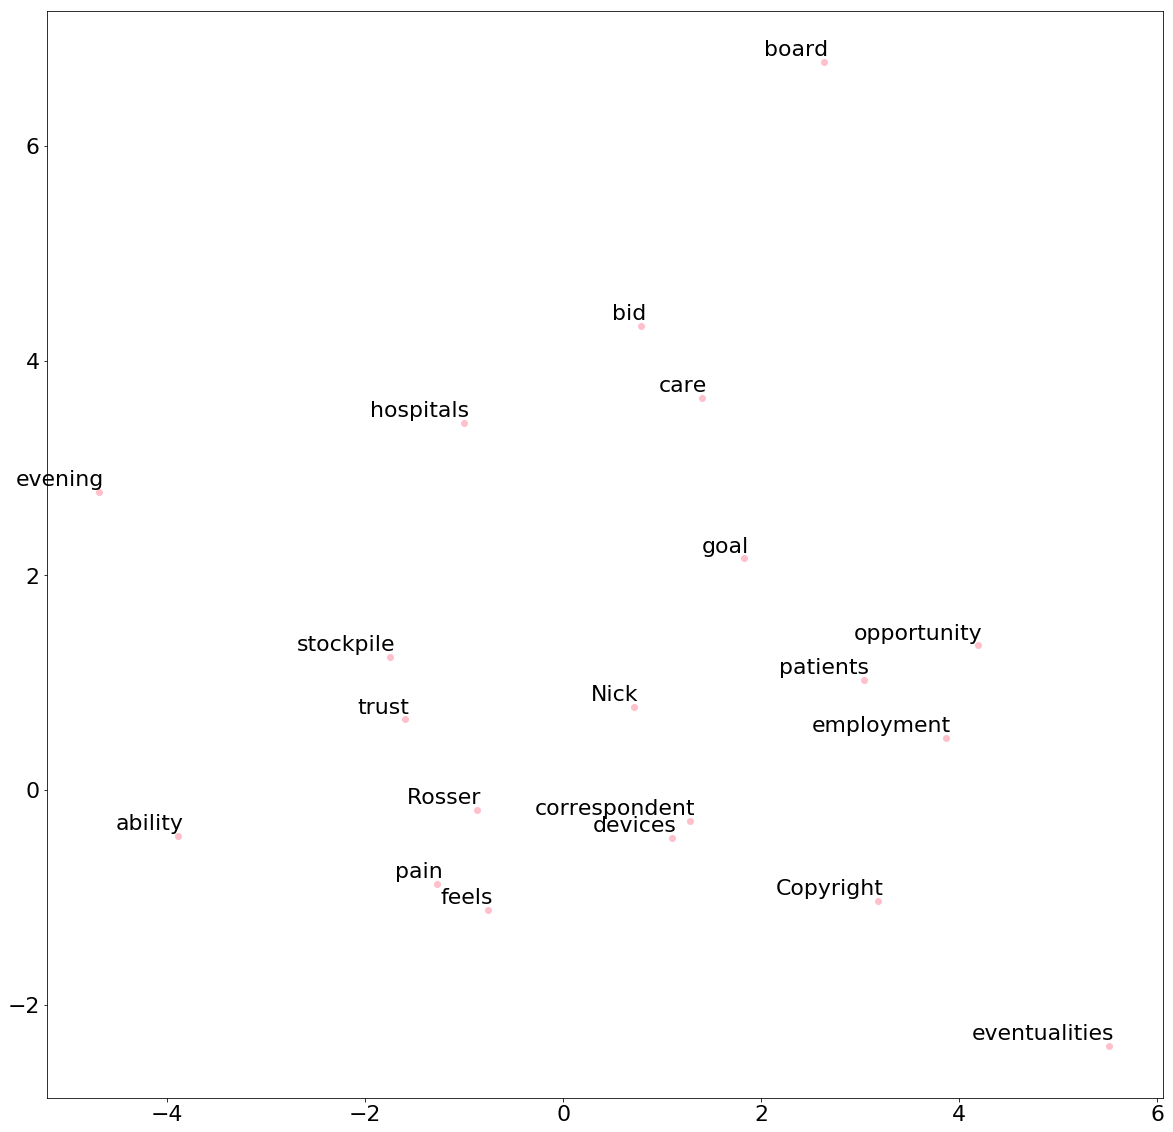

In [17]:

numberOfWords = 20
wordInfo = []

for topicIndex in range (2, 3):
    word2vecProcessor.setTopicFilter(topicIndex)
    wordInfo += word2vecProcessor.getPoints(numberOfWords)
    
processedWords = []
removeWords = ['support', 'peopl', 'govern', 'brexit', 'north']
for word in wordInfo:
    print('x:', word['x'], 'y: ', word['y'], ' --- ', word['stemmed_word'])
    if word['stemmed_word'] not in removeWords:
        processedWords.append(word)
        
plotProcessor = Plotter(wordInfo)
plotProcessor.displayPlot()

